## Problem Statement

Understanding factors influencing loan defaults and to minimize risk and ensure profitability.

## Data Dictionary:

**id**: A unique LC assigned ID for the loan listing

**member_id**: A unique LC assigned Id for the borrower member.

**loan_amnt**: The listed amount of the loan applied for, by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

**funded_amnt**: The total amount committed to that loan at that point in time.

**funded_amnt_inv**: The total amount committed by investors for that loan at that point in time.

**term**: The number of payments on the loan. Values are in months and can be either 36 or 60.

**int_rate**: Interest Rate on the loan.

**installment**: The monthly payment owed by the borrower if the loan originates.

**grade**: LC assigned loan grade.

**sub_grade**: LC assigned loan subgrade.

**emp_title**: The job title supplied by the Borrower when applying for the loan.

**emp_length**: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

**home_ownership**: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

**annual_inc**: The self-reported annual income provided by the borrower during registration.

**verified_status**: Indicates if the borrowers income was verified by LC or not verified.

**issue_d**: The month which the loan was funded.

**pymnt_plan**: Indicates if a payment plan has been put in place for the loan.

**purpose**: A category provided by the borrower for the loan request.

**title**: The loan title provided by the borrower.

**zip_code**: The first 3 numbers of the zip code provided by the borrower in the loan application.

**addr_state**: The state provided by the borrower in the loan application.

**dti**: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

**delinq_2yrs**: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

**earliest_cr_line**: The month the borrower's earliest reported credit line was opened.

**inq_last_6mths**: The number of inquiries in past 6 months (excluding auto and mortgage inquiries).

**open_acc**: The number of open credit lines in the borrower's credit file.

**pub_rec**: Number of derogatory public records.

**revol_bal**: Total credit revolving balance.

**revol_util**: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

**total_acc**: The total number of credit lines currently in the borrower's credit file.

**initial_list_status**: The initial listing status of the loan. Possible values are – W, F.

**out_prncp**: Remaining outstanding principal for total amount funded.

**out_prncp_inv**: Remaining outstanding principal for portion of total amount funded by investors.

**total_pymnt**: Payments received to date for total amount funded.

**total_pymnt_inv**: Payments received to date for portion of total amount funded by investors.

**total_rec_prncp**: Principal received to date.

**total_rec_int**: Interest received to date.

**total_rec_late_fee**: Late fees received to date.

**recoveries**: Post charge off gross recovery.

**collection_recovery_fee**: Post charge off collection fee.

**last_pymnt_d**: Last month payment was received.

**last_pymnt_amnt**: Last total payment amount received.

**next_pymnt_d**: Next scheduled payment date.

**last_credit_pull_d**: The most recent month LC pulled credit for this loan.

**collections_12_mths_ex_med**: Number of collections in 12 months excluding medical collections.

**policy_code**: Publicly available policy_code=1, new products not publicly available policy_code=2.

**application_type**: Indicates whether the loan is an individual application or a joint application with two co-borrowers.

**acc_now_delinq**: The number of accounts on which the borrower is now delinquent.

**tot_coll_amt**: Total collection amounts ever owed.

**tot_cur_bal**: Total current balance of all accounts.

**total_rev_hi_lim**: Total revolving high credit/credit limit.

**default_ind**: Target Variable.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pt
import scipy.stats as stats

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

from warnings import filterwarnings
filterwarnings(action='ignore')

### Read Data

In [2]:
df = pd.read_csv('loan_data.csv',index_col=0)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1069506,1304567,12000,12000,12000.0,36 months,7.90,375.49,A,A4,John Wiley Jr.,10+ years,RENT,62300.0,Not Verified,01-12-2011,n,Borrower added on 12/15/11 > To be used to p...,debt_consolidation,Debt Consolidation,088xx,NJ,16.70,0,01-03-1994,0,38.0,NaN,15,0,8601,21.0,25,f,0.0,0.0,13516.38296,13516.38,12000.00,1516.38,0.0,0.0,0.000,01-01-2015,380.98,NaN,01-09-2015,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1069469,1304526,6000,6000,6000.0,36 months,6.03,182.62,A,A1,"Stewart Enterprises, Inc.",10+ years,MORTGAGE,45600.0,Not Verified,01-12-2011,n,Borrower added on 12/16/11 > Debt Consolidat...,debt_consolidation,Debt-Consolidation,700xx,LA,5.34,0,01-11-1995,1,NaN,NaN,6,0,3378,32.5,28,f,0.0,0.0,6065.86000,6065.86,6000.00,65.86,0.0,0.0,0.000,01-07-2012,15.01,NaN,01-06-2012,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1069126,1303778,10000,10000,9975.0,60 months,10.65,215.69,B,B2,CEC ENTERTAINMENT INC,10+ years,RENT,45996.0,Verified,01-12-2011,n,NaN,debt_consolidation,Consolidation,440xx,OH,21.73,0,01-05-1997,1,NaN,NaN,7,0,11170,30.1,15,f,0.0,0.0,8772.91000,8751.08,5495.38,2429.23,1.0,847.3,152.514,01-04-2015,1.00,NaN,01-06-2015,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1068893,1303514,14400,14400,14400.0,36 months,8.90,457.25,A,A5,Model Metrics,< 1 year,OWN,150000.0,Source Verified,01-12-2011,n,Borrower added on 12/15/11 > I have some 0% ...,debt_consolidation,Credit Payoff 14400,146xx,NY,14.85,0,01-12-1994,0,NaN,NaN,12,0,63864,55.0,38,f,0.0,0.0,16459.51914,16459.52,14400.00,2059.52,0.0,0.0,0.000,01-01-2015,464.02,NaN,01-12-2014,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1069039,1303482,11000,11000,11000.0,36 months,13.49,373.24,C,C1,TX Army National Guard,10+ years,MORTGAGE,48000.0,Verified,01-12-2011,n,NaN,debt_consolidation,Debt Consolidation,786xx,TX,21.82,0,01-12-1999,3,74.0,NaN,15,0,11382,65.0,29,f,0.0,0.0,13413.21605,13413.22,11000.00,2413.22,0.0,0.0,0.000,01-10-2014,1491.29,NaN,01-10-2014,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## About the Data

In [3]:
df.shape

(100000, 73)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           100000 non-null  int64  
 1   member_id                    100000 non-null  int64  
 2   loan_amnt                    100000 non-null  int64  
 3   funded_amnt                  100000 non-null  int64  
 4   funded_amnt_inv              100000 non-null  float64
 5   term                         100000 non-null  object 
 6   int_rate                     100000 non-null  float64
 7   installment                  100000 non-null  float64
 8   grade                        100000 non-null  object 
 9   sub_grade                    100000 non-null  object 
 10  emp_title                    93547 non-null   object 
 11  emp_length                   94856 non-null   object 
 12  home_ownership               100000 non-null  object 
 13  annua

### Checking for Duplicates

In [5]:
df.duplicated().sum()

2958

In [6]:
# Here we are Dropping the Duplicate Rows from our Data Frame.

df.drop_duplicates(inplace=True)

### Null Value Treatment (>30)

In [7]:
# Here we are checking our null value Percentages and planning to drop columns that has more than 30% Null Values.

null_val = round(df.isnull().sum()/df.shape[0]*100,0)
null_val

id                   0.0
member_id            0.0
loan_amnt            0.0
funded_amnt          0.0
funded_amnt_inv      0.0
                    ... 
total_rev_hi_lim    14.0
inq_fi              99.0
total_cu_tl         99.0
inq_last_12m        99.0
default_ind          0.0
Length: 73, dtype: float64

In [8]:
null_val[null_val>=30]

desc                            77.0
mths_since_last_delinq          53.0
mths_since_last_record          86.0
next_pymnt_d                    60.0
mths_since_last_major_derog     78.0
annual_inc_joint               100.0
dti_joint                      100.0
verification_status_joint      100.0
open_acc_6m                     99.0
open_il_6m                      99.0
open_il_12m                     99.0
open_il_24m                     99.0
mths_since_rcnt_il              99.0
total_bal_il                    99.0
il_util                         99.0
open_rv_12m                     99.0
open_rv_24m                     99.0
max_bal_bc                      99.0
all_util                        99.0
inq_fi                          99.0
total_cu_tl                     99.0
inq_last_12m                    99.0
dtype: float64

In [9]:
df.drop(list(null_val[null_val>=30].index),axis=1,inplace=True)

### Manually Identifing Redundant Variables

In [10]:
df.id.value_counts()

id
1069506     1
6550355     1
6540102     1
5938658     1
6530411     1
           ..
63869767    1
64290339    1
64350462    1
64380293    1
36260758    1
Name: count, Length: 97042, dtype: int64

In [11]:
df.member_id.value_counts()

member_id
1304567     1
8102437     1
8092200     1
7411081     1
8082450     1
           ..
68290540    1
68760057    1
68820181    1
68850006    1
38972123    1
Name: count, Length: 97042, dtype: int64

In [12]:
df.zip_code.value_counts()

zip_code
112xx    1092
945xx    1078
750xx     988
331xx     894
606xx     869
         ... 
046xx       1
045xx       1
585xx       1
039xx       1
516xx       1
Name: count, Length: 869, dtype: int64

In [13]:
loan_amnt_and_funded_amnt_diff = df[df.loan_amnt != df.funded_amnt]
loan_amnt_and_funded_amnt_diff.shape

# Loan amount and Funded amount has only 429 different records.

(429, 51)

In [14]:
funded_amnt_and_funded_amnt_inv_diff = df[df.funded_amnt != df.funded_amnt_inv]
funded_amnt_and_funded_amnt_inv_diff.shape

# Funded amount and Funded amount Inverster columns has only 13365 different records.

(13365, 51)

In [15]:
out_prncp_and_out_prncp_inv_diff = df[df.out_prncp != df.out_prncp_inv]
out_prncp_and_out_prncp_inv_diff.shape

# Outstanding Principal Amount and Outstanding Principal Inverster Amount columns has only 3296 different records.

(3296, 51)

In [16]:
total_pymnt_and_total_pymnt_inv_diff = df[df.total_pymnt != df.total_pymnt_inv]
total_pymnt_and_total_pymnt_inv_diff.shape

# Total Payment Received and Total Invester Payment Received columns has only 17452 different records.

(17452, 51)

In [17]:
df.pymnt_plan.value_counts()

# Payment Plan has only 'n' for all the records

pymnt_plan
n    97042
Name: count, dtype: int64

In [18]:
df.policy_code.value_counts()

# Policy Code has only '1' for all the records

policy_code
1    97042
Name: count, dtype: int64

### Removing Redundant Variables

In [19]:
# Here we have dropped 'id','member_id','zip_code' columns because it has unique values for all columns.
# Dropping 'loan_amnt' because it has only 429 different records from 'funded_amnt'
# We are dropping 'funded_amnt_inv','out_prncp_inv','total_pymnt_inv' because 
# they have similar values as 'funded_amnt','out_prncp','total_pymnt'
# We Drop 'Payment Plan' because it has same 'n' value for all the rows
# We Drop 'policy_code' because it has same '1' value for all the rows

df.drop(['id','member_id','loan_amnt','zip_code','funded_amnt_inv','out_prncp_inv','total_pymnt_inv',
         'pymnt_plan','policy_code'],axis=1,inplace=True)

## Feature Engineering

In [20]:
df.head()

,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,12000,36 months,7.90,375.49,A,A4,John Wiley Jr.,10+ years,RENT,62300.0,Not Verified,01-12-2011,debt_consolidation,Debt Consolidation,NJ,16.70,0,01-03-1994,0,15,0,8601,21.0,25,f,0.0,13516.38296,12000.00,1516.38,0.0,0.0,0.000,01-01-2015,380.98,01-09-2015,0.0,INDIVIDUAL,0,NaN,NaN,NaN,0
1,6000,36 months,6.03,182.62,A,A1,"Stewart Enterprises, Inc.",10+ years,MORTGAGE,45600.0,Not Verified,01-12-2011,debt_consolidation,Debt-Consolidation,LA,5.34,0,01-11-1995,1,6,0,3378,32.5,28,f,0.0,6065.86000,6000.00,65.86,0.0,0.0,0.000,01-07-2012,15.01,01-06-2012,0.0,INDIVIDUAL,0,NaN,NaN,NaN,0
2,10000,60 months,10.65,215.69,B,B2,CEC ENTERTAINMENT INC,10+ years,RENT,45996.0,Verified,01-12-2011,debt_consolidation,Consolidation,OH,21.73,0,01-05-1997,1,7,0,11170,30.1,15,f,0.0,8772.91000,5495.38,2429.23,1.0,847.3,152.514,01-04-2015,1.00,01-06-2015,0.0,INDIVIDUAL,0,NaN,NaN,NaN,1
3,14400,36 months,8.90,457.25,A,A5,Model Metrics,< 1 year,OWN,150000.0,Source Verified,01-12-2011,debt_consolidation,Credit Payoff 14400,NY,14.85,0,01-12-1994,0,12,0,63864,55.0,38,f,0.0,16459.51914,14400.00,2059.52,0.0,0.0,0.000,01-01-2015,464.02,01-12-2014,0.0,INDIVIDUAL,0,NaN,NaN,NaN,0
4,11000,36 months,13.49,373.24,C,C1,TX Army National Guard,10+ years,MORTGAGE,48000.0,Verified,01-12-2011,debt_consolidation,Debt Consolidation,TX,21.82,0,01-12-1999,3,15,0,11382,65.0,29,f,0.0,13413.21605,11000.00,2413.22,0.0,0.0,0.000,01-10-2014,1491.29,01-10-2014,0.0,INDIVIDUAL,0,NaN,NaN,NaN,0


### Funded Amount

Skewness:  0.693676299938624
Kurtosis:  -0.2174789636668697


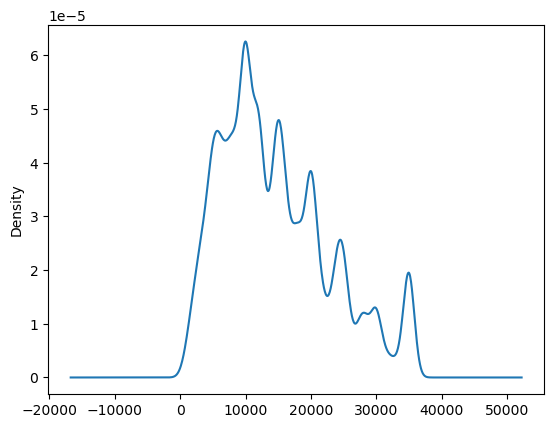

In [21]:
df.funded_amnt.plot(kind='kde')
print('Skewness: ',df.funded_amnt.skew())
print('Kurtosis: ',df.funded_amnt.kurt())
plt.show()

In [22]:
# we can see that there is no extreme outliers in Funded Amount.

In [23]:
df.funded_amnt.isna().sum()

0

<Axes: xlabel='default_ind', ylabel='funded_amnt'>

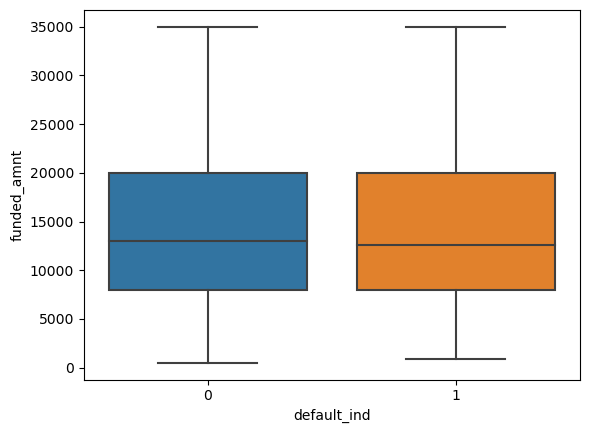

In [24]:
sns.boxplot(x=df.default_ind,y=df.funded_amnt)

In [25]:
# we can see that there is no outliers in Funded Amount

### Term

<Axes: xlabel='term'>

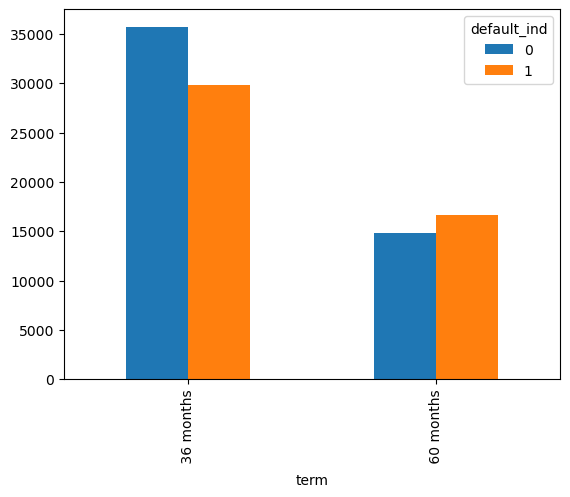

In [26]:
pd.crosstab(df.term,df.default_ind).plot(kind='bar')

In [27]:
# we can infer that People who got Loan in the term of '36 months' are less prone to default.

In [28]:
df.term.isna().sum()

0

In [29]:
# Chi Square Test:

# H0 - The Term is not dependant on Loan Default
# H1 - The Term is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.term,df.default_ind))[1] <=0.05

True

In [30]:
df = pd.concat([df,pd.get_dummies(df.term,dtype='int',drop_first=True)],axis=1)
df.drop('term',axis=1,inplace=True)

### Intrest Rate

Skewness:  0.254263374932314
Kurtosis:  -0.39174606519230704


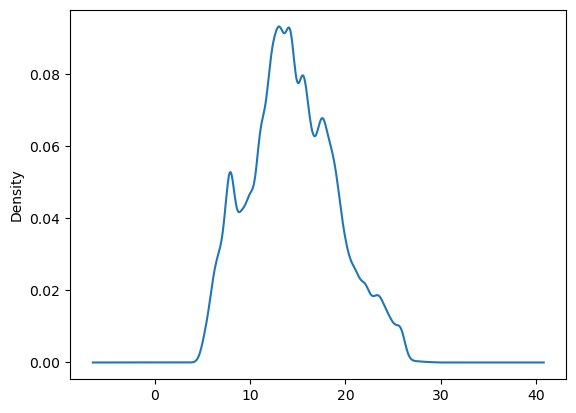

In [31]:
df.int_rate.plot(kind='kde')
print('Skewness: ',df.int_rate.skew())
print('Kurtosis: ',df.int_rate.kurt())
plt.show()

In [32]:
# we can see that there is no extreme outliers in Intrest Rate.

In [33]:
df.int_rate.isna().sum()

0

<Axes: xlabel='default_ind', ylabel='int_rate'>

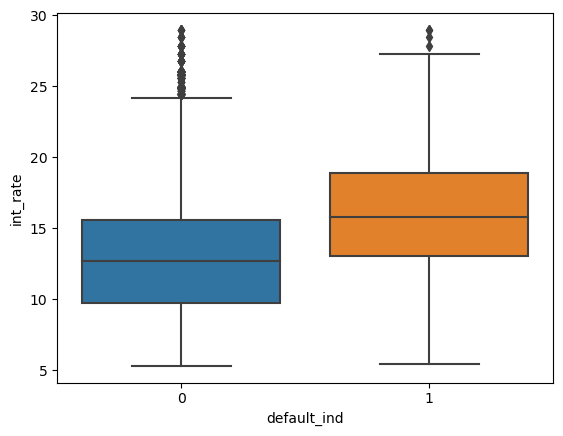

In [34]:
sns.boxplot(x=df.default_ind,y=df.int_rate)

In [35]:
# we can see that there is some outliers present in upper bound.

### Installment

Skewness:  0.9406479256573406
Kurtosis:  0.7417436222296492


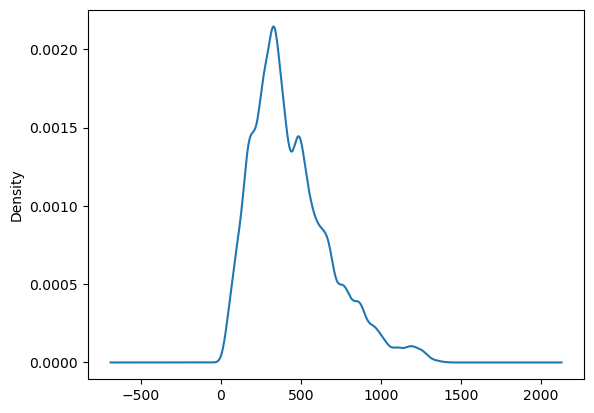

In [36]:
df.installment.plot(kind='kde')
print('Skewness: ',df.installment.skew())
print('Kurtosis: ',df.installment.kurt())
plt.show()

In [37]:
df.installment.isna().sum()

0

<Axes: xlabel='default_ind', ylabel='installment'>

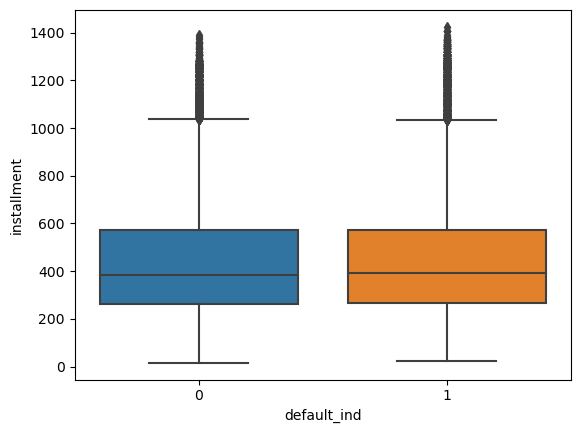

In [38]:
sns.boxplot(x=df.default_ind,y=df.installment)

In [39]:
# we can see that there is some outliers present in upper bound.

### Grade

<Axes: xlabel='grade'>

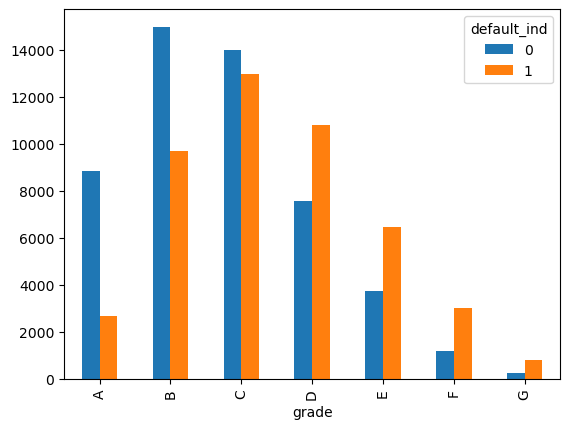

In [40]:
pd.crosstab(df.grade,df.default_ind).plot(kind='bar')

In [41]:
# We can Infer that Customers who belong to grade 'A', 'B' and 'C' are less Prone to default.
# We can also see that Grade 'A' customers defaulted the Least.
# We can Infer that Customers who belong to grade 'D', 'E', 'F' and 'G' are More Prone to default.

In [42]:
df.grade.isna().sum()

0

In [43]:
# Chi Square Test:

# H0 - The Grade is not dependant on Loan Default
# H1 - The Grade is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.grade,df.default_ind))[1] <=0.05

True

In [44]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['G','F','E','D','C','B','A']],dtype='int')
df.grade = oe.fit_transform(df[['grade']])

### Sub Grade

<Axes: xlabel='sub_grade'>

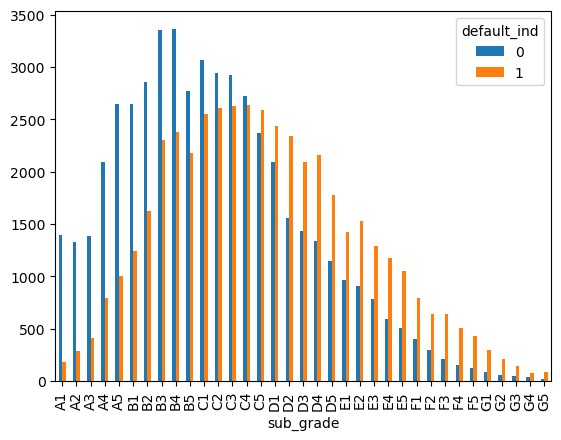

In [45]:
pd.crosstab(df.sub_grade,df.default_ind).plot(kind='bar')

In [46]:
# We can see that the 'Sub Grade' is similar to Grade.
# we can see the same information again.

In [47]:
df.sub_grade.isna().sum()

0

In [48]:
# Chi Square Test:

# H0 - The Grade is not dependant on Loan Default
# H1 - The Grade is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.sub_grade,df.default_ind))[1] <=0.05

True

In [49]:
print(sorted(list(df.sub_grade.value_counts().index))[::-1])

['G5', 'G4', 'G3', 'G2', 'G1', 'F5', 'F4', 'F3', 'F2', 'F1', 'E5', 'E4', 'E3', 'E2', 'E1', 'D5', 'D4', 'D3', 'D2', 'D1', 'C5', 'C4', 'C3', 'C2', 'C1', 'B5', 'B4', 'B3', 'B2', 'B1', 'A5', 'A4', 'A3', 'A2', 'A1']


In [50]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['G5', 'G4', 'G3', 'G2', 'G1', 'F5', 'F4', 'F3', 'F2', 'F1', 'E5', 'E4', 'E3', 'E2', 'E1', 'D5', 'D4', 'D3', 'D2', 'D1', 'C5', 'C4', 'C3', 'C2', 'C1', 'B5', 'B4', 'B3', 'B2', 'B1', 'A5', 'A4', 'A3', 'A2', 'A1']],dtype='int')
df.sub_grade = oe.fit_transform(df[['sub_grade']])

In [51]:
df[['grade','sub_grade']].corr()

,grade,sub_grade
grade,1.000000,0.978933
sub_grade,0.978933,1.000000


In [52]:
# We can say that subgrade and Grade are providing the same Pattern.
# So we can drop it.

In [53]:
df.drop('sub_grade',axis=1,inplace=True)

### Employee Title

In [54]:
df.emp_title.value_counts()

# we can see that Employee Title has too many Subcategory. So we need to bucket them.

emp_title
Teacher                               1134
Manager                               1081
Registered Nurse                       477
Supervisor                             460
RN                                     449
                                      ... 
Manufacturing Specialist (back-up)       1
part driver                              1
manager, email marketing                 1
Director,  Product Management            1
Gunnery Sgt Instructor                   1
Name: count, Length: 51978, dtype: int64

In [55]:
# Here we used Prompting to seperate the first 200 Employee Title to categrice them into 4 Buckets which had the highest
# frequencies and categrised the other employee Title as other to reduce the Dimensions.

management = ['Manager', 'Supervisor', 'Project Manager', 'General Manager', 'Office Manager', 'Director', 'President', 'Operations Manager', 'Vice President', 'Account Manager', 'Sales Manager', 'Executive Assistant', 'Store Manager', 'Police Officer', 'Assistant Manager', 'Account Executive', 'Program Manager', 'CEO', 'IT Manager', 'Branch Manager', 'District Manager', 'Director of Operations', 'Executive Director', 'Officer', 'Superintendent', 'Service Manager', 'Accounting Manager', 'Marketing Manager', 'Security Officer', 'Production Manager', 'Business Manager', 'VP', 'Property Manager', 'Correctional Officer', 'Loan Officer', 'Senior Manager', 'Regional Manager', 'Manager ', 'Senior Project Manager', 'Case Manager', 'Finance Manager', 'Director of Sales', 'Supervisor ', 'Coordinator', 'Managing Director', 'Area Manager', 'Project Coordinator', 'Warehouse Manager', 'CFO', 'Plant Manager', 'Regional Sales Manager']
engineering = ['Engineer', 'Technician', 'Analyst', 'Software Engineer', 'Mechanic', 'Business Analyst', 'Electrician', 'Financial Analyst', 'Network Engineer', 'Systems Engineer', 'Software Developer', 'machinist', 'Senior Software Engineer', 'Machine Operator', 'Senior Analyst', 'Systems Analyst', 'Tech', 'Service Technician']
healthcare = ['Registered Nurse', 'Nurse', 'CNA', 'LPN', 'Pharmacist', 'Physician', 'Medical Assistant', 'Respiratory Therapist', 'Nurse Practitioner', 'Paramedic', 'Physical Therapist']
general = ['Teacher', 'RN', 'Owner', 'Sales', 'Driver', 'manager', 'owner', 'teacher', 'driver', 'Administrative Assistant', 'supervisor', 'Accountant', 'sales', 'Attorney', 'truck driver', 'Truck Driver', 'Server', 'Paralegal', 'US Army', 'Controller', 'Consultant', 'Bank of America', 'mechanic', 'registered nurse', 'Principal', 'Administrator', 'Operator', 'Foreman', 'Legal Assistant', 'Customer Service', 'Registered nurse', 'nurse', 'Associate', 'Professor', 'Clerk', 'technician', 'Machinist', 'Walmart', 'server', 'Cashier', 'Underwriter', 'Secretary', 'AT&T', 'Sales Associate', 'Social Worker', 'USPS', 'Laborer', 'Kaiser Permanente', 'Bookkeeper', 'Instructor', 'foreman', 'Maintenance', 'Agent', 'general manager', 'operator', 'Sales Rep', 'store manager', 'USAF', 'Financial Advisor', 'clerk', 'MANAGER', 'machine operator', 'Legal Secretary', 'UPS', 'Truck driver', 'laborer', 'Sales Representative', 'Staff Accountant', 'Dispatcher', 'Senior Accountant', 'Wells Fargo', 'Bartender', 'maintenance', 'Senior Consultant', 'Management', 'Realtor', 'Buyer', 'Firefighter', 'US Postal Service', 'Pastor', 'Receptionist', 'Educator', 'Assistant Principal', 'Welder', 'Sergeant', 'General manager', 'Teacher ', 'United States Postal Service', 'Pilot', 'Office manager', 'sales manager', 'office manager', 'customer service', 'Counselor', 'Customer Service Representative', 'assistant manager', 'Recruiter', 'Custodian', 'IT Specialist', 'IBM', 'Letter Carrier', 'engineer', 'Partner', 'Personal Banker', 'Captain', 'electrician', 'police officer', 'warehouse', 'Inspector', 'cashier', 'Administration', 'OWNER', 'service tech', 'Project manager', 'Chef', 'welder', 'US Air Force', 'CSR', 'Auditor', 'US ARMY']

In [56]:
def bucket1(a):
    if a in management:
        return 'Management'
    elif a in engineering:
        return 'Engineering'
    elif a in healthcare:
        return 'Healthcare'
    elif a in general:
        return 'General'
    else:
        return 'Other'

In [57]:
df.emp_title = df.emp_title.apply(bucket1)

In [58]:
# Chi Square Test:

# H0 - The Employee Title is not dependant on Loan Default
# H1 - The Employee Title is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.emp_title,df.default_ind))[1] <=0.05

True

In [59]:
df = pd.concat([df,pd.get_dummies(df.emp_title,dtype='int',drop_first=True)],axis=1)
df.drop('emp_title',axis=1,inplace=True)

### Employee Length

<Axes: xlabel='emp_length'>

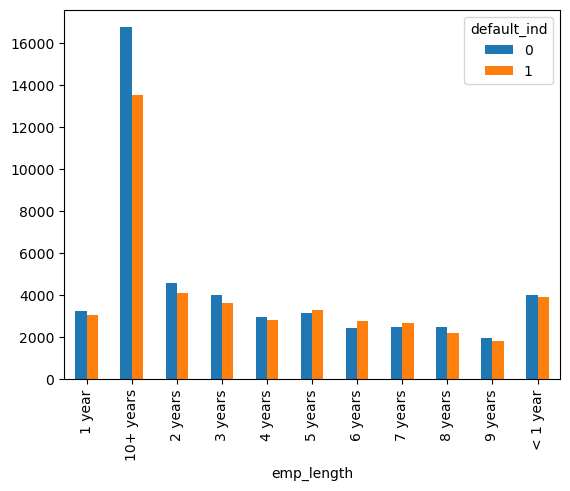

In [60]:
pd.crosstab(df.emp_length,df.default_ind).plot(kind='bar')

In [61]:
# We can infer that most of the Loan were given to the people who has more than 10 years of experiance.
# The people who have Experiance more than 10 years has defaulted less compared to others

In [62]:
def year(x):
    l=[]
    for i in x:
        if i.isdigit():
            l.append(i)
    return int(''.join(l))

In [63]:
df.emp_length.isna().sum()

# Here we can see that around 5% of our data has Null Values, So we categrice them as 'Unknown'

4975

In [64]:
df.emp_length = df.emp_length.map(lambda x: year(x) if isinstance(x,str) else x)

In [65]:
def bucket2(x):
    if x<3:
        return 'Fresher'
    elif x>=3 and x<=5:
        return 'Intermediate'
    elif x>5:
        return 'Senior'
    else:
        return 'Unknown'

In [66]:
df.emp_length = df.emp_length.apply(bucket2)

In [67]:
# Chi Square Test:

# H0 - The Employee Length is not dependant on Loan Default
# H1 - The Employee Length is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.emp_length,df.default_ind))[1] <=0.05

True

In [68]:
df = pd.concat([df,pd.get_dummies(df.emp_length,dtype='int',drop_first=True)],axis=1)
df.drop('emp_length',axis=1,inplace=True)

### Home Ownership

<Axes: xlabel='home_ownership'>

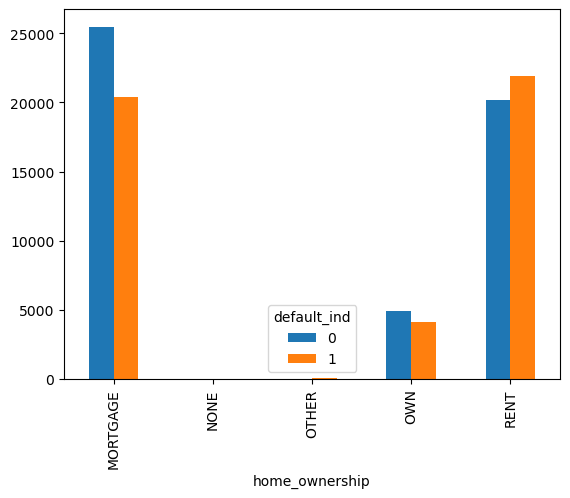

In [69]:
pd.crosstab(df.home_ownership,df.default_ind).plot(kind='bar')

In [70]:
# We can Infer that Customer who have Mortgage defaulted less compared to others.
# But in General Cases, It didn't have a significant impact on defaulting.

In [71]:
df.home_ownership.isna().sum()

0

In [72]:
# Chi Square Test:

# H0 - The Home Ownership is not dependant on Loan Default
# H1 - The Home Ownership is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.home_ownership,df.default_ind))[1] <=0.05

True

In [73]:
df = pd.concat([df,pd.get_dummies(df.home_ownership,dtype='int',drop_first=True)],axis=1)
df.drop('home_ownership',axis=1,inplace=True)

### Verification Status

In [74]:
df.verification_status = df.verification_status.replace('Source Verified','Verified')

<Axes: xlabel='verification_status'>

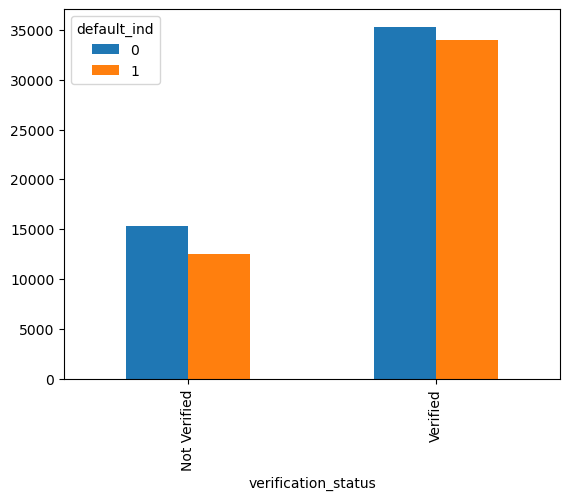

In [75]:
pd.crosstab(df.verification_status,df.default_ind).plot(kind='bar')

In [76]:
# We can see that Verification Status does not have a significant impact on Loan default.

In [77]:
df.verification_status.isna().sum()

0

In [78]:
# Chi Square Test:

# H0 - The Verification Status is not dependant on Loan Default
# H1 - The Verification Status is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.verification_status,df.default_ind))[1] <=0.05

True

In [79]:
df = pd.concat([df,pd.get_dummies(df.verification_status,dtype='int',drop_first=True)],axis=1)
df.drop('verification_status',axis=1,inplace=True)

### Issue Date

In [80]:
df.issue_d.value_counts()

issue_d
01-10-2014    4033
01-07-2014    3496
01-01-2015    3138
01-10-2015    3018
01-07-2015    2975
              ... 
01-08-2007      10
01-11-2007      10
01-08-2008       9
01-09-2008       7
01-09-2007       5
Name: count, Length: 101, dtype: int64

In [81]:
df.issue_d.isna().sum()

0

In [82]:
# Chi Square Test:

# H0 - The Issue Date is not dependant on Loan Default
# H1 - The Issue Date is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.issue_d,df.default_ind))[1] <=0.05

True

In [83]:
# Here we are converting 'Issue Date' into four seperate columns to gather some inference out of it.

df.issue_d = pd.to_datetime(df.issue_d)

df['issue_d_year'] = df.issue_d.dt.year
df['issue_d_month'] = df.issue_d.dt.month
df['issue_d_date'] = df.issue_d.dt.day

df.drop('issue_d',axis=1,inplace=True)

<Axes: xlabel='issue_d_year'>

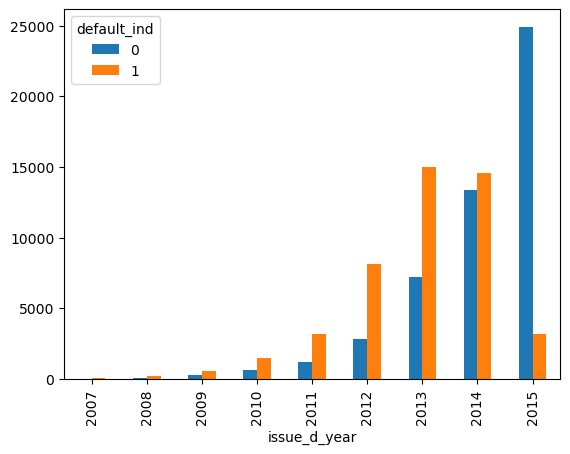

In [84]:
pd.crosstab(df.issue_d_year,df.default_ind).plot(kind='bar')

In [85]:
# We can Infer that the Loan Defaulters Reduced Over the Period of Years.
# We can see that in 2015, There is a huge difference in Loan Defaulters.

<Axes: xlabel='issue_d_month'>

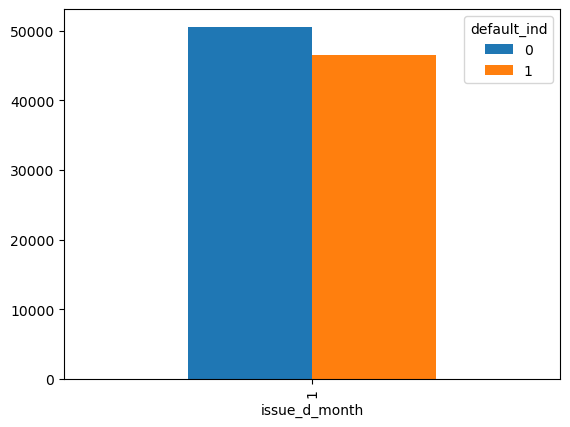

In [86]:
pd.crosstab(df.issue_d_month,df.default_ind).plot(kind='bar')

In [87]:
# We can Infer that the Loan was issued in first month of Every Year.

<Axes: xlabel='issue_d_date'>

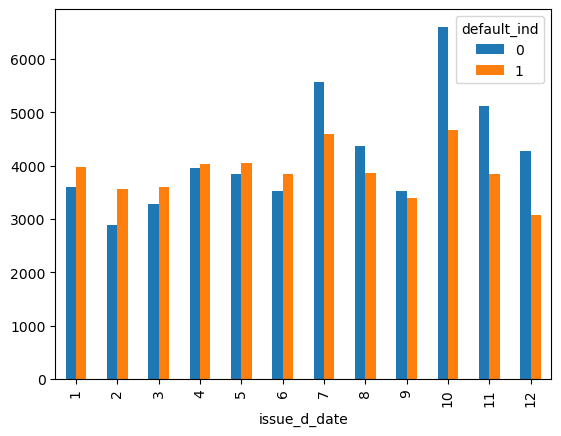

In [88]:
pd.crosstab(df.issue_d_date,df.default_ind).plot(kind='bar')

In [89]:
# We can Infer that the Days of Loan Issued does not have a huge impact on Loan Defaulters.
# we can also say that the more Loans was issued on Dates 7 and 10.

### Annual Income

Skewness:  0.9406479256573406
Kurtosis:  0.7417436222296492


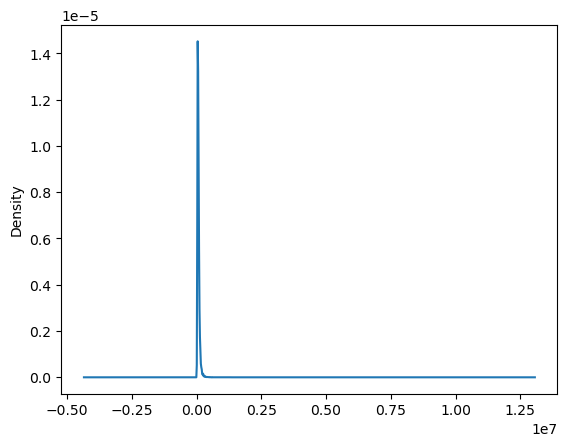

In [90]:
df.annual_inc.plot(kind='kde')
print('Skewness: ',df.installment.skew())
print('Kurtosis: ',df.installment.kurt())
plt.show()

In [91]:
# we can see that our Data is highly Right Skewed.

In [92]:
df.annual_inc.isna().sum()

0

<Axes: xlabel='default_ind', ylabel='annual_inc'>

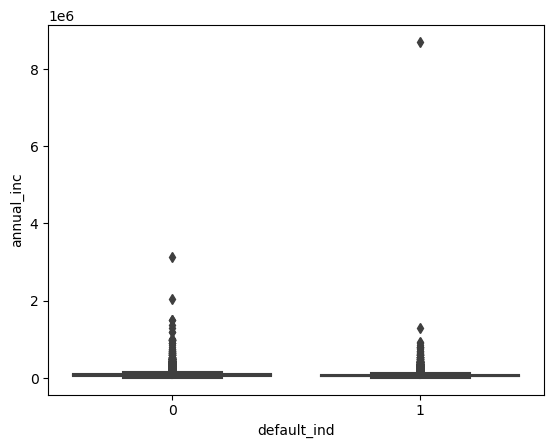

In [93]:
sns.boxplot(x=df.default_ind,y=df.annual_inc)

In [94]:
# We can see that we have an extreme outlier in Loan Defaulter
# Though the customer had enough income, he Defaulted

In [95]:
q1 = df.annual_inc.quantile(0.25)
q3 = df.annual_inc.quantile(0.75)
iqr= q3-q1
ul = q3+(30*iqr)
ll = q1-(30*iqr)

In [96]:
df = df[~(df.annual_inc>ul) | (df.annual_inc<ll)]

# Here we are Dropping 6 extreme Records for our Better Model Building

<Axes: xlabel='default_ind', ylabel='annual_inc'>

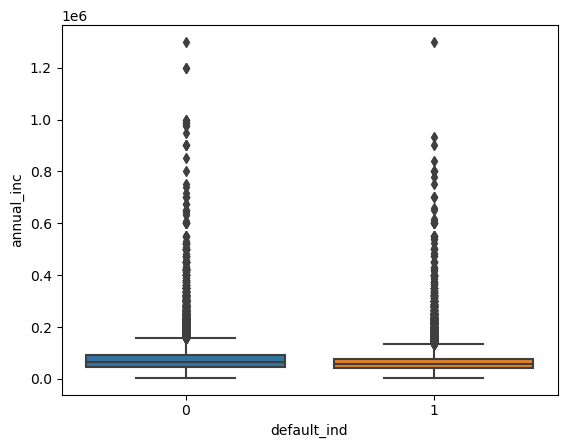

In [97]:
sns.boxplot(x=df.default_ind,y=df.annual_inc)

In [98]:
# With this set of outliers we are Proceeding for further analysis.

### Purpose

<Axes: xlabel='purpose'>

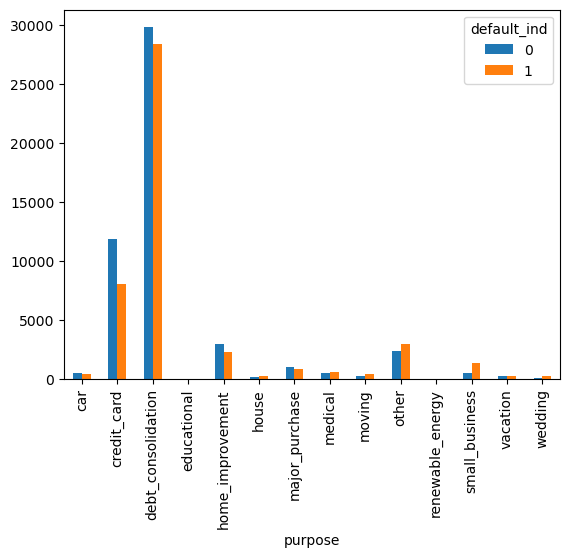

In [99]:
pd.crosstab(df.purpose,df.default_ind).plot(kind='bar')

In [100]:
# We can see that Most of the Loans purpose were 'Credit Card' and 'Debit Consolidation'

In [101]:
df.purpose.isna().sum()

0

In [102]:
# Chi Square Test:

# H0 - The Purpose is not dependant on Loan Default
# H1 - The Purpose is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.purpose,df.default_ind))[1] <=0.05

True

In [103]:
df = pd.concat([df,pd.get_dummies(df.purpose,dtype='int',drop_first=True)],axis=1)
df.drop('purpose',axis=1,inplace=True)

### Title

In [104]:
df.title.value_counts()

title
Debt consolidation                     38069
Credit card refinancing                13502
Home improvement                        3437
Other                                   3181
Debt Consolidation                      2775
                                       ...  
Ninja 650r                                 1
Taking Control of Debt                     1
on my way                                  1
Cancel some revolving credit               1
Profitable Small Biz debt consolide        1
Name: count, Length: 14241, dtype: int64

In [105]:
# We can see that the column 'Title' is similar to the 'Employee Title'
# Due to the Large number of unique name of the Titles we are going to bucket them to reduce the Dimensanality.
# It will be similar to the 'Employee Title' Column
# So, we are Dropping it.

In [106]:
df.drop('title',axis=1,inplace=True)

### Address State

In [107]:
df.addr_state.value_counts()

addr_state
CA    14942
NY     8329
TX     7198
FL     7027
NJ     3783
IL     3657
PA     3374
OH     3252
GA     3102
VA     2959
NC     2720
MI     2526
MD     2329
MA     2223
AZ     2219
WA     2116
CO     1858
MN     1716
MO     1639
NV     1520
IN     1407
CT     1399
AL     1306
TN     1289
WI     1227
LA     1200
OR     1157
SC     1077
KY      935
OK      925
KS      828
AR      724
UT      716
HI      567
NM      551
WV      435
RI      418
NH      399
MS      328
MT      264
DE      256
AK      232
DC      231
WY      185
SD      183
VT      180
NE       73
ME       31
ND       22
ID        1
IA        1
Name: count, dtype: int64

In [108]:
# We can see that there is Large number of name of states.
# So, We will try to bucket them into regions with the help of prompting.

In [109]:
df.addr_state.isna().sum()

0

In [110]:
def bucket3(x):
    if x in ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']:
        return 'northeast'
    elif x in ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']:
        return 'midwest'
    elif x in  ['AL', 'AR', 'DC', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV']:
        return 'south'
    elif x in ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']:
        return 'west'

In [111]:
df.addr_state = df.addr_state.apply(bucket3)

In [112]:
# Chi Square Test:

# H0 - The Address State is not dependant on Loan Default
# H1 - The Address State is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.addr_state,df.default_ind))[1] <=0.05

True

In [113]:
df = pd.concat([df,pd.get_dummies(df.addr_state,dtype='int',drop_first=True)],axis=1)
df.drop('addr_state',axis=1,inplace=True)

### DTI Score

Skewness:  0.15231775796259758
Kurtosis:  -0.5348917291056323


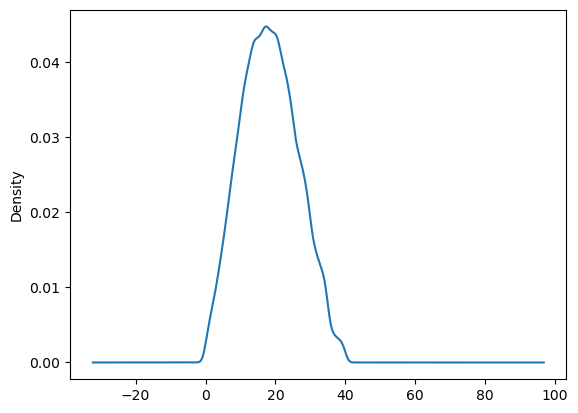

In [114]:
df.dti.plot(kind='kde')
print('Skewness: ',df.dti.skew())
print('Kurtosis: ',df.dti.kurt())
plt.show()

In [115]:
# we can see that our score is little normally Distributed.

In [116]:
df.dti.isna().sum()

0

<Axes: xlabel='default_ind', ylabel='dti'>

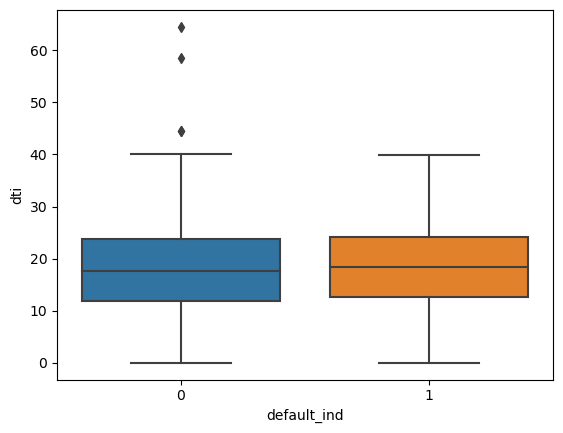

In [117]:
sns.boxplot(x=df.default_ind,y=df.dti)

In [118]:
# We can see that Non Defaulted Customers have some little outliers

### No of Delinquents

<Axes: xlabel='delinq_2yrs'>

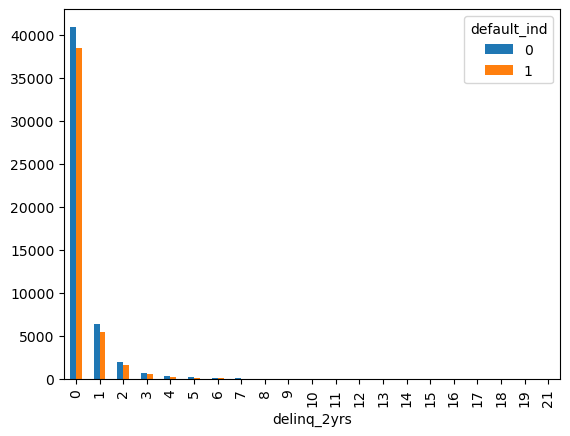

In [119]:
pd.crosstab(df.delinq_2yrs,df.default_ind).plot(kind='bar')

In [120]:
# Cant Infer from the about Chart due to the domination of sub class like 0,1 and 2.
# so we are dividing them into 2 graphs.

<Axes: xlabel='delinq_2yrs'>

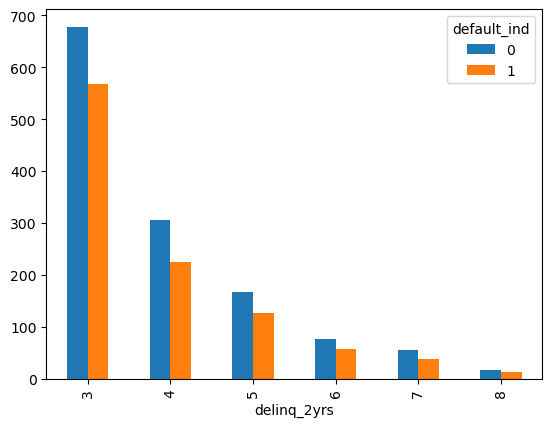

In [121]:
pd.crosstab(df.delinq_2yrs[(df.delinq_2yrs<=8)&(df.delinq_2yrs>2)],df.default_ind).plot(kind='bar')

In [122]:
# We can infer that the customers delinquents till 8 where seems to be normal with no significant Impact.

<Axes: xlabel='delinq_2yrs'>

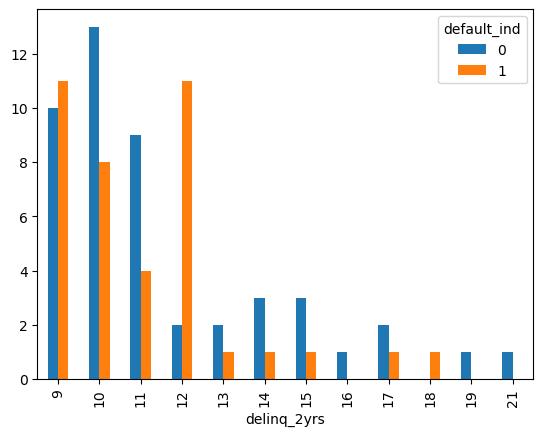

In [123]:
pd.crosstab(df.delinq_2yrs[df.delinq_2yrs>8],df.default_ind).plot(kind='bar')

In [124]:
# when the customers delinquents after 8 seems to be in Danger for the Bank.
# when the number goes up greater the or equal to 8 they should be specally monitered.

In [125]:
df.delinq_2yrs.isna().sum()

0

In [126]:
pd.Series(df.delinq_2yrs.value_counts().index).quantile(0.75)

15.0

In [127]:
def bucket4(a):
    if a<5:
        return 'b4 Low'
    elif a>=5 and a<10:
        return 'b4 Medium'
    elif a<=10 and a<15:
        return 'b4 High'
    elif a>=15:
        return 'b4 Very High'

In [128]:
df.delinq_2yrs = df.delinq_2yrs.apply(bucket4)

In [129]:
# Chi Square Test:

# H0 - The Delinquents is not dependant on Loan Default
# H1 - The Delinquents is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.delinq_2yrs,df.default_ind))[1] <=0.05

True

In [130]:
df = pd.concat([df,pd.get_dummies(df.delinq_2yrs,dtype='int',drop_first=True)],axis=1)
df.drop('delinq_2yrs',axis=1,inplace=True)

### Earliest Credit Line

In [131]:
df.earliest_cr_line

0        01-03-1994
1        01-11-1995
2        01-05-1997
3        01-12-1994
4        01-12-1999
            ...    
99994    01-10-1995
99996    01-12-2001
99997    01-11-2003
99998    01-08-1990
99999    01-06-2002
Name: earliest_cr_line, Length: 97036, dtype: object

In [132]:
df.earliest_cr_line.isna().sum()

0

In [133]:
# Chi Square Test:

# H0 - The Earliest Credit Line Date is not dependant on Loan Default
# H1 - The Earliest Credit Line Date is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.earliest_cr_line,df.default_ind))[1] <=0.05

True

In [134]:
# Here we are converting 'Earliest Payment Date' into four seperate columns to gather some inference out of it.

df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line)

df['earliest_cr_line_year'] = df.earliest_cr_line.dt.year
df['earliest_cr_line_month'] = df.earliest_cr_line.dt.month
df['earliest_cr_line_date'] = df.earliest_cr_line.dt.day

df.drop('earliest_cr_line',axis=1,inplace=True)

<Axes: xlabel='earliest_cr_line_year'>

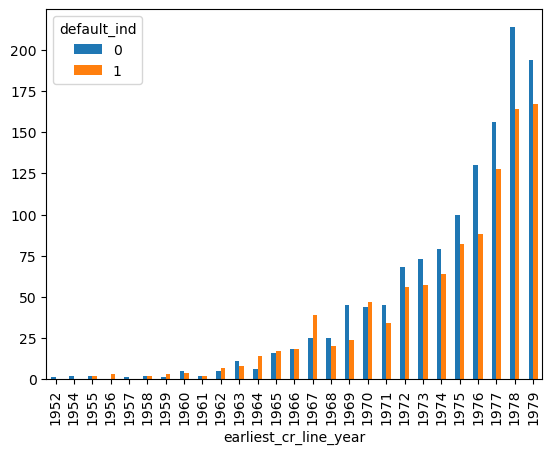

In [135]:
pd.crosstab(df.earliest_cr_line_year[df.earliest_cr_line_year<1980],df.default_ind).plot(kind='bar')

<Axes: xlabel='earliest_cr_line_year'>

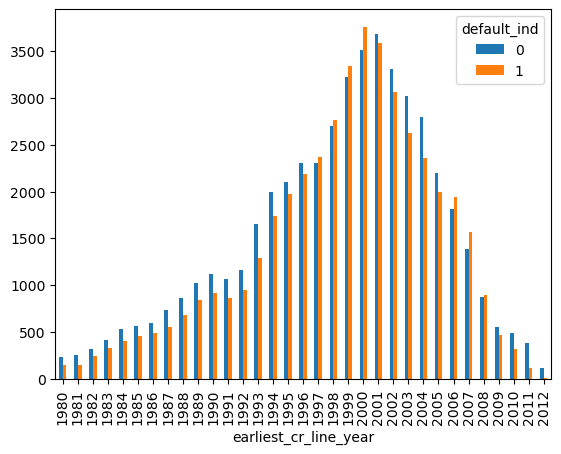

In [136]:
pd.crosstab(df.earliest_cr_line_year[df.earliest_cr_line_year>=1980],df.default_ind).plot(kind='bar')

In [137]:
# From the above two Graphs we can infer that more people opened their first credit during the period from 1993 to 2007.
# We can also say that earliest credit line does not have a huge impact on Loan Default.

### Credit Enquires

<Axes: xlabel='inq_last_6mths'>

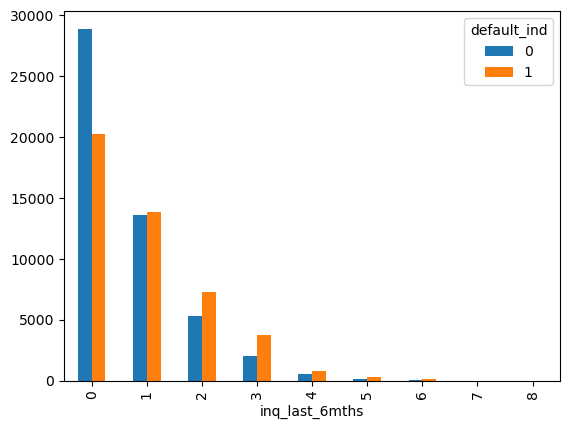

In [138]:
pd.crosstab(df.inq_last_6mths,df.default_ind).plot(kind='bar')

<Axes: xlabel='inq_last_6mths'>

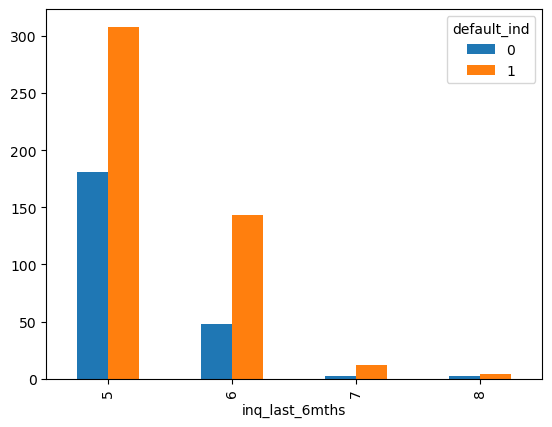

In [139]:
pd.crosstab(df.inq_last_6mths[df.inq_last_6mths>4],df.default_ind).plot(kind='bar')

In [140]:
# From the Above Two Graphs we can say that customers who was enquired more by crediter prones to default.

In [141]:
df.inq_last_6mths.isna().sum()

0

In [142]:
def bucket5(a):
    if a==0:
        return 'b5 Good'
    elif a==1:
        return 'b5 Medium'
    else:
        return 'b5 Danger'

In [143]:
df.inq_last_6mths = df.inq_last_6mths.apply(bucket5)

In [144]:
# Chi Square Test:

# H0 - The Credit Enquiry is not dependant on Loan Default
# H1 - The Credit Enquiry is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.inq_last_6mths,df.default_ind))[1] <=0.05

True

In [145]:
df = pd.concat([df,pd.get_dummies(df.inq_last_6mths,dtype='int',drop_first=True)],axis=1)
df.drop('inq_last_6mths',axis=1,inplace=True)

### Open Credit Accounts

In [146]:
df.open_acc.value_counts()

open_acc
9     8972
10    8763
8     8529
11    8136
7     7686
12    7230
6     6177
13    6097
14    5165
5     4405
15    4260
16    3450
17    2877
4     2639
18    2261
19    1911
20    1467
3     1219
21    1149
22     928
23     710
24     572
25     462
2      416
26     330
27     249
28     187
29     159
30     125
31     102
32      67
33      65
34      45
35      40
36      39
37      22
1       21
38      19
42      14
40      12
39      12
41      11
43       9
45       4
48       4
51       4
0        3
47       2
44       2
57       1
75       1
53       1
55       1
49       1
84       1
50       1
76       1
Name: count, dtype: int64

In [147]:
pd.Series(sorted(list(df.open_acc.value_counts().index))).quantile(0.75)

42.0

In [148]:
def bucket6(a):
    if a<14:
        return 'b6 Low'
    elif a>=14 and a<28:
        return 'b6 Medium'
    elif a<=28 and a<42:
        return 'b6 High'
    elif a>=42:
        return 'b6 Very High'

In [149]:
df.open_acc = df.open_acc.apply(bucket6)

In [150]:
# Chi Square Test:

# H0 - The Open Credit Accounts is not dependant on Loan Default
# H1 - The Open Credit Accounts is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.open_acc,df.default_ind))[1] <=0.05

True

In [151]:
df = pd.concat([df,pd.get_dummies(df.open_acc,dtype='int',drop_first=True)],axis=1)
df.drop('open_acc',axis=1,inplace=True)

### Derogatory public records

<Axes: xlabel='pub_rec'>

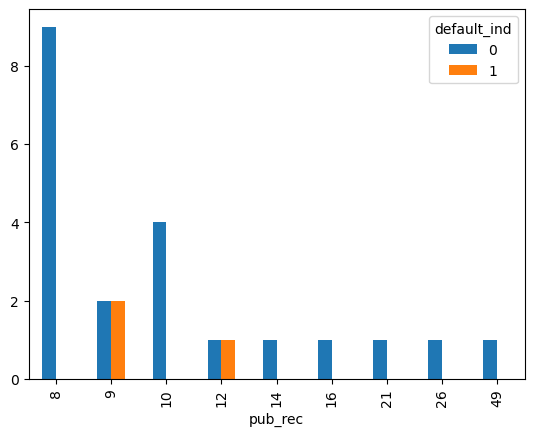

In [152]:
pd.crosstab(df.pub_rec[df.pub_rec>7],df.default_ind).plot(kind='bar')

In [153]:
# We can infer that higher the Derogatory public records does not impact Loan Default.
# we can drop this variable, because I does not provide any variance to predict the loan default.

In [154]:
df.pub_rec.isna().sum()

0

In [155]:
df.drop('pub_rec',axis=1,inplace=True)

### Revolving Balance

Skewness:  34.58820305095497
Kurtosis:  3700.1310568928925


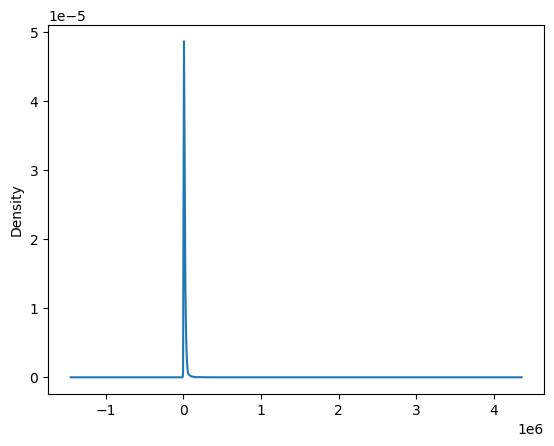

In [156]:
df.revol_bal.plot(kind='kde')
print('Skewness: ',df.revol_bal.skew())
print('Kurtosis: ',df.revol_bal.kurt())
plt.show()

In [157]:
# we can see that our Data is highly Right Skewed. 

In [158]:
df.revol_bal.isna().sum()

0

<Axes: xlabel='default_ind', ylabel='revol_bal'>

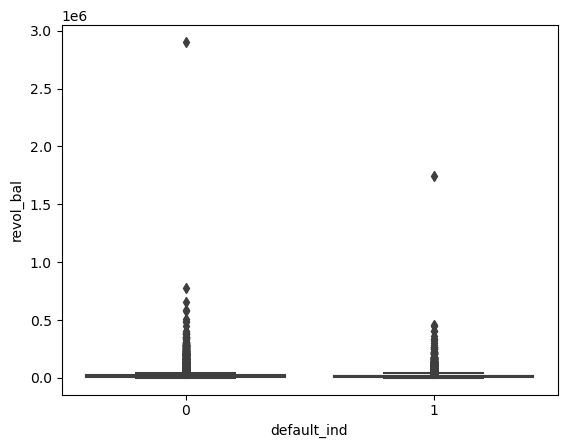

In [159]:
sns.boxplot(x=df.default_ind,y=df.revol_bal)

In [160]:
# We can see that we have an extreme outlier in both Defaulter and Non-Defaulter.
# So we will try to drop the Extreme outliers in both the variables using IQR Method.

In [161]:
q1 = df.revol_bal.quantile(0.25)
q3 = df.revol_bal.quantile(0.75)
iqr= q3-q1
ul = q3+(50*iqr)
ll = q1-(50*iqr)

In [162]:
df = df[~(df.revol_bal>ul) | (df.revol_bal<ll)]

<Axes: xlabel='default_ind', ylabel='revol_bal'>

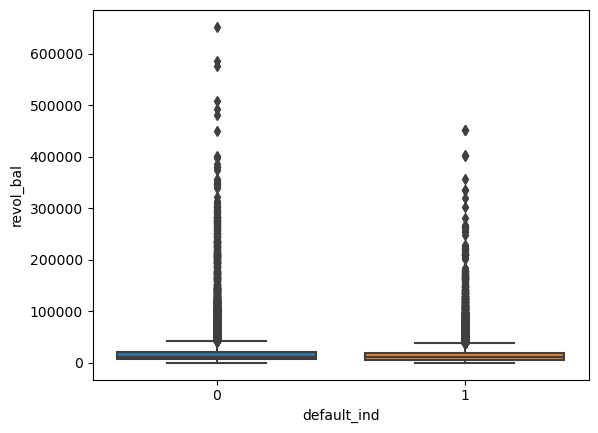

In [163]:
sns.boxplot(x=df.default_ind,y=df.revol_bal)

In [164]:
# We have Dropped 3 of the records that has extreme high values in Revolving Balance.
# Proceding for furter Analysis.

### Revolving Credit

Skewness:  -0.2766612352841946
Kurtosis:  -0.6607633795038872


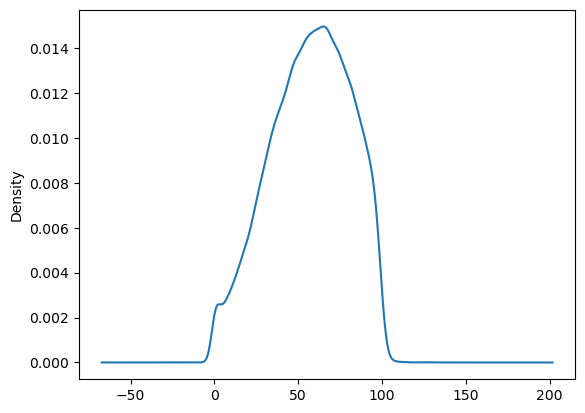

In [165]:
df.revol_util.plot(kind='kde')
print('Skewness: ',df.revol_util.skew())
print('Kurtosis: ',df.revol_util.kurt())
plt.show()

In [166]:
# We can infer that our data is slightly not normally distributed.

In [167]:
df.revol_util.isna().sum()

# we can fill the null values with KNNImputer because it will fill the null values based on nearest Neighbour.

67

In [168]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=5)
df.revol_util = knn.fit_transform(df[['revol_util']])

<Axes: xlabel='default_ind', ylabel='revol_util'>

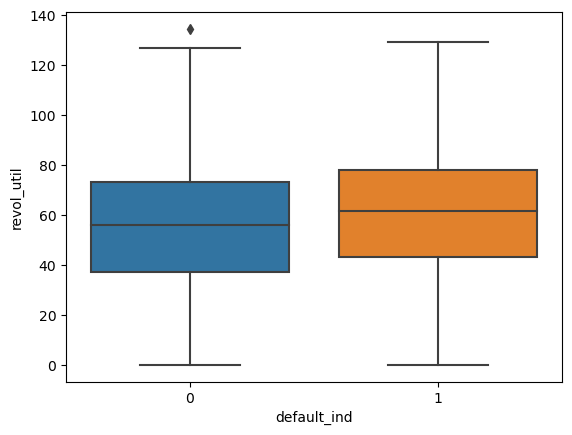

In [169]:
sns.boxplot(x=df.default_ind,y=df.revol_util)

In [170]:
# We can see that there are not much outliers present.
# We can proceed for further analysis.

### Total Credit Lines

Skewness:  0.9022380433409725
Kurtosis:  1.4500778629892168


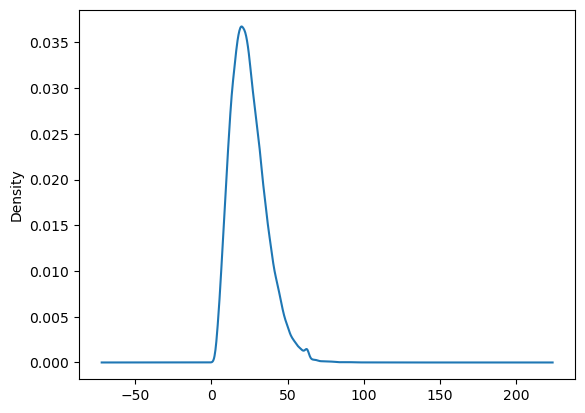

In [171]:
df.total_acc.plot(kind='kde')
print('Skewness: ',df.total_acc.skew())
print('Kurtosis: ',df.total_acc.kurt())
plt.show()

In [172]:
# We can see that our data is not normally distributed.

In [173]:
df.total_acc.isna().sum()

0

<Axes: xlabel='default_ind', ylabel='total_acc'>

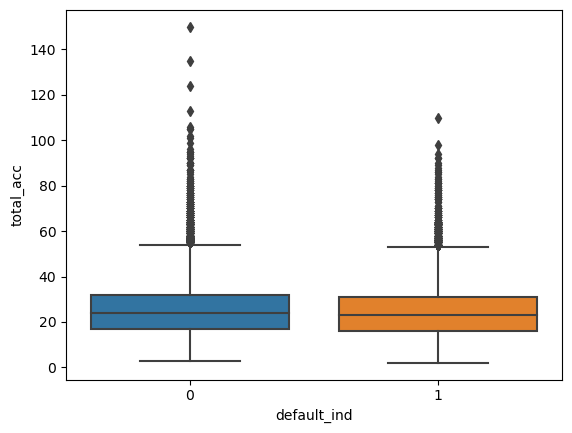

In [174]:
sns.boxplot(x=df.default_ind,y=df.total_acc)

In [175]:
# We can see that there is many outliers present in our data.
# For our base model we are proceding without doing outlier treatments.

### Initial Listing Status

<Axes: xlabel='initial_list_status'>

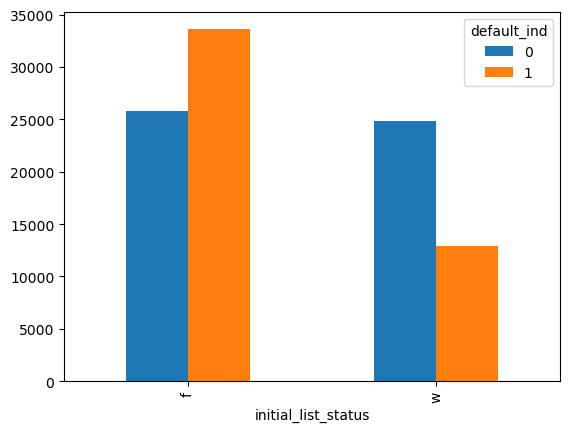

In [176]:
pd.crosstab(df.initial_list_status,df.default_ind).plot(kind='bar')

In [177]:
# We can see that the loan given as Whole are less prone to default and
# the loan given in fraction are more prone to default.

In [178]:
df.initial_list_status.isna().sum()

0

In [179]:
# Chi Square Test:

# H0 - The Initial Listing Status is not dependant on Loan Default
# H1 - The Initial Listing Status is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.initial_list_status,df.default_ind))[1] <=0.05

True

In [180]:
df = pd.concat([df,pd.get_dummies(df.initial_list_status,dtype='int',drop_first=True)],axis=1)
df.drop('initial_list_status',axis=1,inplace=True)

### Remaining Outstanding Principle

Skewness:  1.7008593176674727
Kurtosis:  2.1976882275237215


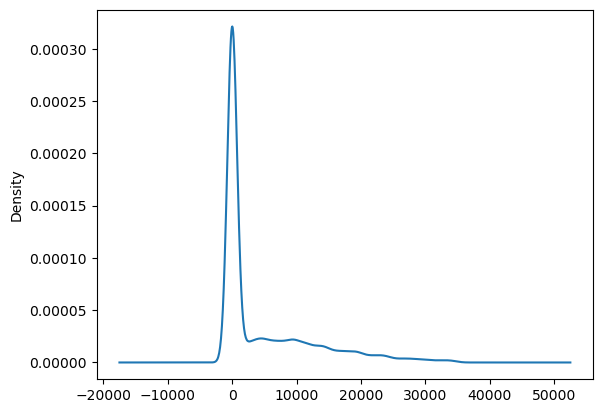

In [181]:
df.out_prncp.plot(kind='kde')
print('Skewness: ',df.out_prncp.skew())
print('Kurtosis: ',df.out_prncp.kurt())
plt.show()

In [182]:
# We can see that our data is not normally distributed.

In [183]:
df.out_prncp.isna().sum()

0

<Axes: xlabel='default_ind', ylabel='out_prncp'>

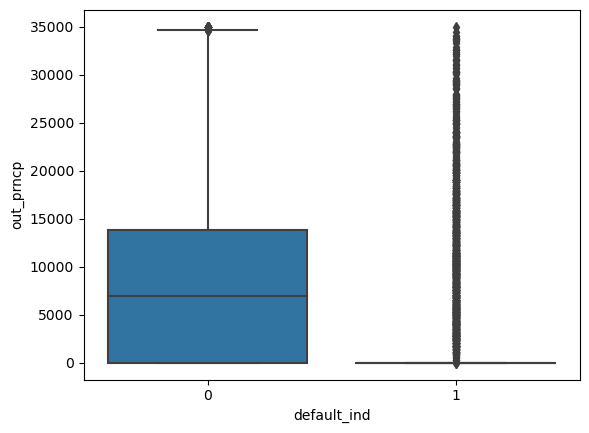

In [184]:
sns.boxplot(x=df.default_ind,y=df.out_prncp)

In [185]:
# We can see that defaulters didnt pay the money so that in class1 we can only see outliers.

### Total Amount Recieved ToDate

Skewness:  1.90832887327027
Kurtosis:  4.596765909851094


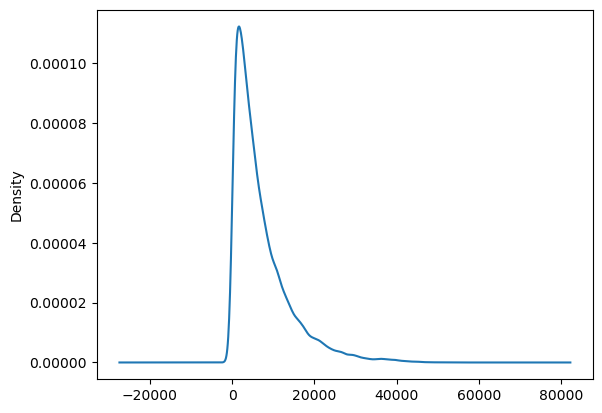

In [186]:
df.total_pymnt.plot(kind='kde')
print('Skewness: ',df.total_pymnt.skew())
print('Kurtosis: ',df.total_pymnt.kurt())
plt.show()

In [187]:
# We can see that our data is highly skewed.

In [188]:
df.total_pymnt.isna().sum()

0

<Axes: xlabel='default_ind', ylabel='total_pymnt'>

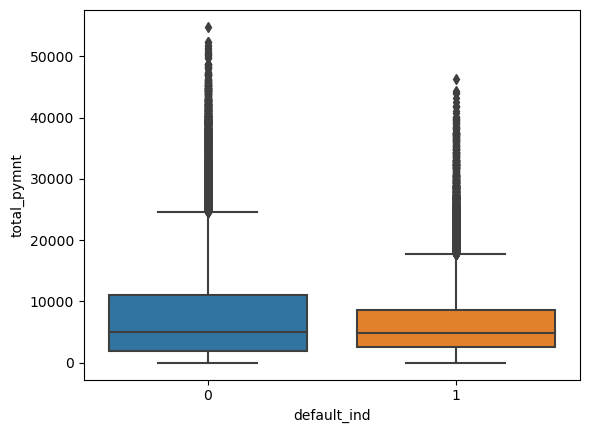

In [189]:
sns.boxplot(x=df.default_ind,y=df.total_pymnt)

In [190]:
# We can see that many outliers present.
# we cant remove the outliers because, when it come to bank Data set we cant take risk by capping or dropping them.

### Principal Recieved to Date

Skewness:  2.3732315449544763
Kurtosis:  6.811826211017202


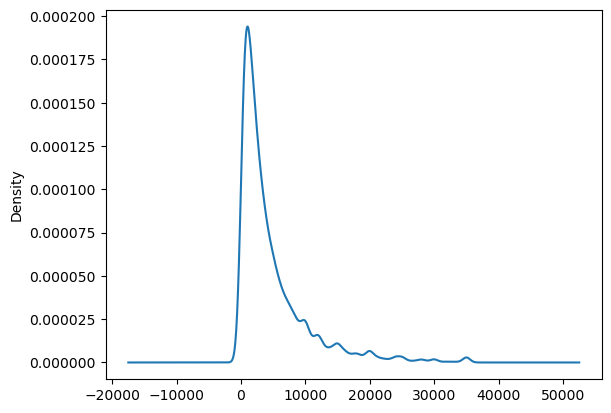

In [191]:
df.total_rec_prncp.plot(kind='kde')
print('Skewness: ',df.total_rec_prncp.skew())
print('Kurtosis: ',df.total_rec_prncp.kurt())
plt.show()

In [192]:
# We can see that our Data is Right Skewed.

In [193]:
df.total_rec_prncp.isna().sum()

0

<Axes: xlabel='default_ind', ylabel='total_rec_prncp'>

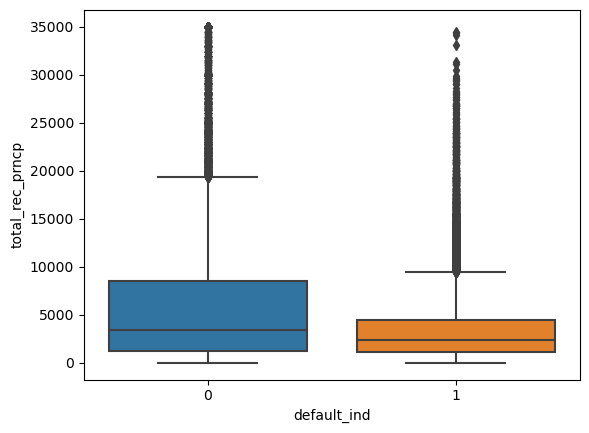

In [194]:
sns.boxplot(x=df.default_ind,y=df.total_rec_prncp)

In [195]:
df[['total_pymnt','total_rec_prncp']].corr()

,total_pymnt,total_rec_prncp
total_pymnt,1.000000,0.934299
total_rec_prncp,0.934299,1.000000


In [196]:
# We can see that the variables 'Total Payment' and 'Total Recever Principle' are almost the same.
# Which means the variance provided are the same.

### Intrest Received to Date

Skewness:  2.5710121620243145
Kurtosis:  9.358783520402065


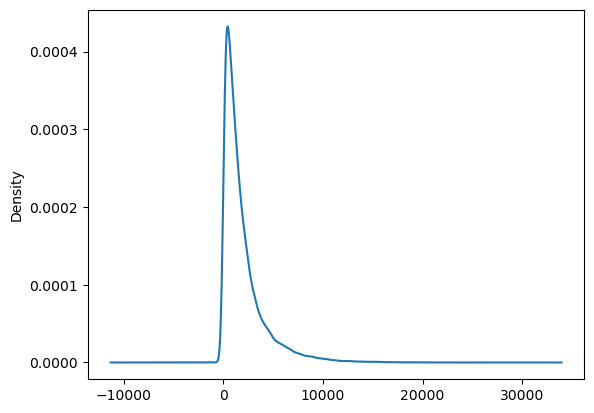

In [197]:
df.total_rec_int.plot(kind='kde')
print('Skewness: ',df.total_rec_int.skew())
print('Kurtosis: ',df.total_rec_int.kurt())
plt.show()

In [198]:
# We can see that our data is right skewed.

In [199]:
df.total_rec_int.isna().sum()

0

<Axes: xlabel='default_ind', ylabel='total_rec_int'>

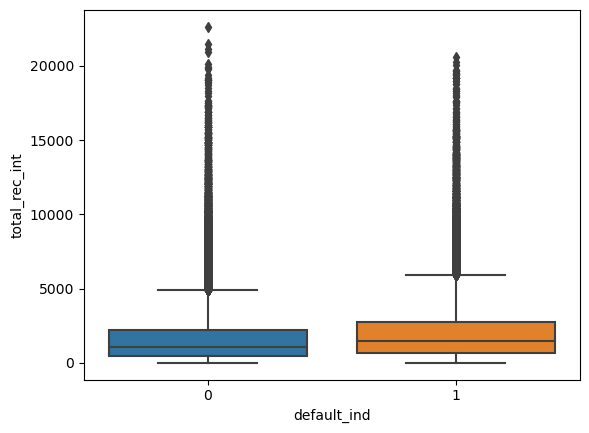

In [200]:
sns.boxplot(x=df.default_ind,y=df.total_rec_int)

In [201]:
# We can see that many outliers are there in both of them.

### Late Fees Received to date

Skewness:  10.106717579179932
Kurtosis:  190.541630494073


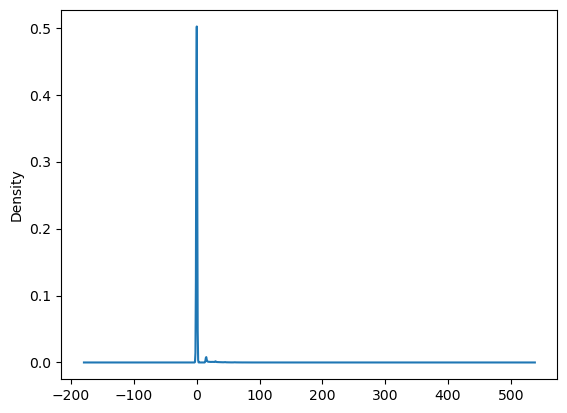

In [202]:
df.total_rec_late_fee.plot(kind='kde')
print('Skewness: ',df.total_rec_late_fee.skew())
print('Kurtosis: ',df.total_rec_late_fee.kurt())
plt.show()

In [203]:
# we can see that our Data is Right Skewed.

In [204]:
df.total_rec_late_fee.isna().sum()

0

<Axes: xlabel='default_ind', ylabel='total_rec_late_fee'>

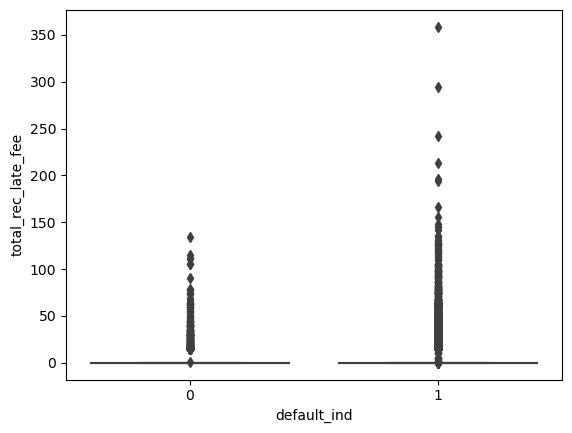

In [205]:
sns.boxplot(x=df.default_ind,y=df.total_rec_late_fee)

In [206]:
# We can see that most of our data has only 0.
# We can say that only 2814 people was late in Payment and Paid the Late Fee

In [207]:
df.total_rec_late_fee[df.total_rec_late_fee>0].quantile(0.66)

29.924843852000002

In [208]:
def bucket7(x):
    if x == 0:
        return 'b7 On Time'
    elif x>0 and x<15:
        return 'b7 Little Late'
    elif x>=15 and x<30:
        return 'b7 Late'
    elif x>=30:
        return 'b7 Too Late'

In [209]:
df.total_rec_late_fee = df.total_rec_late_fee.apply(bucket7)

In [210]:
# Chi Square Test:

# H0 - The Late Fee received is not dependant on Loan Default
# H1 - The Late Fee received is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.total_rec_late_fee,df.default_ind))[1] <=0.05

True

In [211]:
df = pd.concat([df,pd.get_dummies(df.total_rec_late_fee,dtype='int',drop_first=True)],axis=1)
df.drop('total_rec_late_fee',axis=1,inplace=True)

### Recoveries

Skewness:  5.979636109879181
Kurtosis:  71.73569401722034


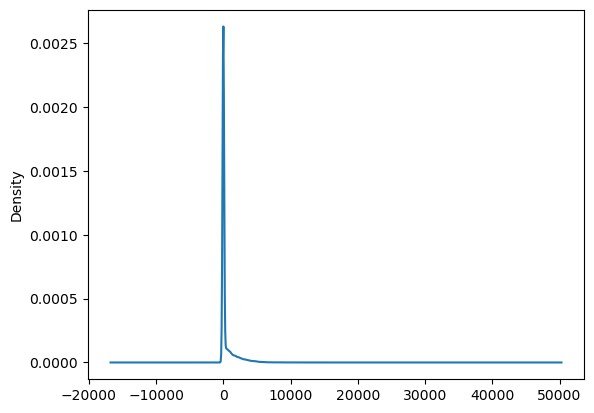

In [212]:
df.recoveries.plot(kind='kde')
print('Skewness: ',df.recoveries.skew())
print('Kurtosis: ',df.recoveries.kurt())
plt.show()

In [213]:
# we can see that our Data is Right Skewed.

In [214]:
df.recoveries.isna().sum()

0

<Axes: xlabel='default_ind', ylabel='recoveries'>

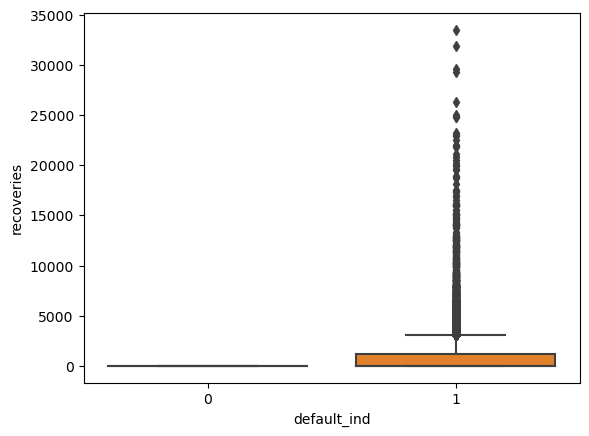

In [215]:
sns.boxplot(x=df.default_ind,y=df.recoveries)

In [216]:
# We can see the outliers present in recoveries.

In [217]:
df.recoveries[df.recoveries > 0].quantile(0.66)

1824.2224

In [218]:
def bucket8(x):
    if x == 0:
        return 'b8 On Time'
    elif x>0 and x<670:
        return 'b8 Little Late'
    elif x>=670 and x<1825:
        return 'b8 Late'
    elif x>=1825:
        return 'b8 Too Late'

In [219]:
df.recoveries = df.recoveries.apply(bucket8)

In [220]:
# Chi Square Test:

# H0 - The Recoveries is not dependant on Loan Default
# H1 - The Recoveries is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.recoveries,df.default_ind))[1] <=0.05

True

In [221]:
df = pd.concat([df,pd.get_dummies(df.recoveries,dtype='int',drop_first=True)],axis=1)
df.drop('recoveries',axis=1,inplace=True)

### Collection Recovery Fees

Skewness:  9.75897095928376
Kurtosis:  193.17033362648104


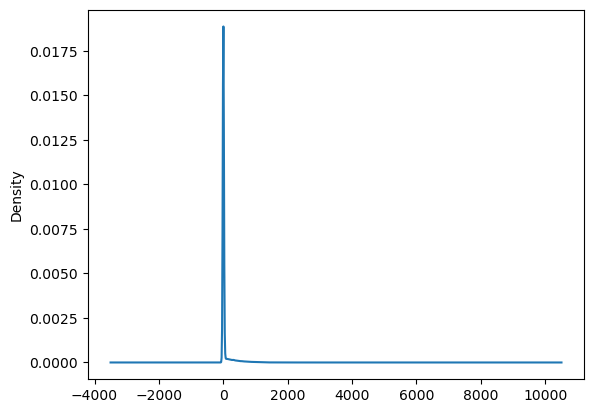

In [222]:
df.collection_recovery_fee.plot(kind='kde')
print('Skewness: ',df.collection_recovery_fee.skew())
print('Kurtosis: ',df.collection_recovery_fee.kurt())
plt.show()

In [223]:
# we can see that our Data is Right Skewed.

In [224]:
df.collection_recovery_fee.isna().sum()

0

<Axes: xlabel='default_ind', ylabel='collection_recovery_fee'>

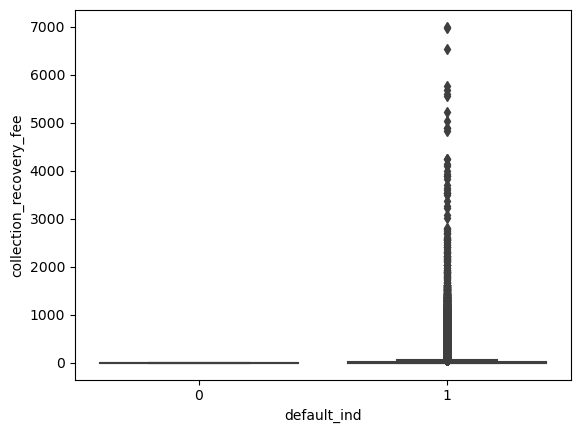

In [225]:
sns.boxplot(x=df.default_ind,y=df.collection_recovery_fee)

In [226]:
# We can see the outliers present in Collection Recovery Fees.

In [227]:
df.collection_recovery_fee[df.collection_recovery_fee > 0].quantile(0.66)

128.85667200000003

In [228]:
def bucket9(x):
    if x == 0:
        return 'b9 On Time'
    elif x>0 and x<11:
        return 'b9 Little Late'
    elif x>=11 and x<128:
        return 'b9 Late'
    elif x>=128:
        return 'b9 Too Late'

In [229]:
df.collection_recovery_fee = df.collection_recovery_fee.apply(bucket9)

In [230]:
# Chi Square Test:

# H0 - The Collection Recovery Fees is not dependant on Loan Default
# H1 - The Collection Recovery Fees is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.collection_recovery_fee,df.default_ind))[1] <=0.05

True

In [231]:
df = pd.concat([df,pd.get_dummies(df.collection_recovery_fee,dtype='int',drop_first=True)],axis=1)
df.drop('collection_recovery_fee',axis=1,inplace=True)

### Last Payment Date

In [232]:
df.last_pymnt_d.value_counts()

last_pymnt_d
01-01-2016    29336
01-12-2015     8818
01-07-2015     3857
01-08-2015     3585
01-06-2015     3154
              ...  
01-06-2008        4
01-02-2008        1
01-01-2008        1
01-11-2008        1
01-03-2008        1
Name: count, Length: 96, dtype: int64

In [233]:
df.last_pymnt_d.isna().sum()

1079

In [234]:
df = df[~df.last_pymnt_d.isna()]

# Here we are dropping 1079 records which is our 1% of our data.
# Because we cant impute median or Mode of other data of people who never Paid.

In [235]:
# Chi Square Test:

# H0 - The Last Payment Date is not dependant on Loan Default
# H1 - The Last Payment Date is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.last_pymnt_d,df.default_ind))[1] <=0.05

True

In [236]:
# Here we are converting 'Issue Date' into four seperate columns to gather some inference out of it.

df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d)

df['last_pymnt_d_year'] = df.last_pymnt_d.dt.year
df['last_pymnt_d_month'] = df.last_pymnt_d.dt.month
df['last_pymnt_d_date'] = df.last_pymnt_d.dt.day

df.drop('last_pymnt_d',axis=1,inplace=True)

<Axes: xlabel='last_pymnt_d_year'>

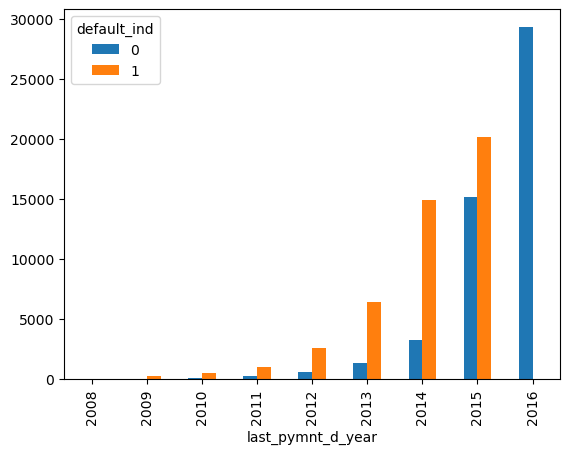

In [237]:
pd.crosstab(df.last_pymnt_d_year,df.default_ind).plot(kind='bar')

In [238]:
# We can see that most of the Last Payment Date are paid by defaulters.
# Here we can infer that People who tend to pay late are more prone to default.

<Axes: xlabel='last_pymnt_d_month'>

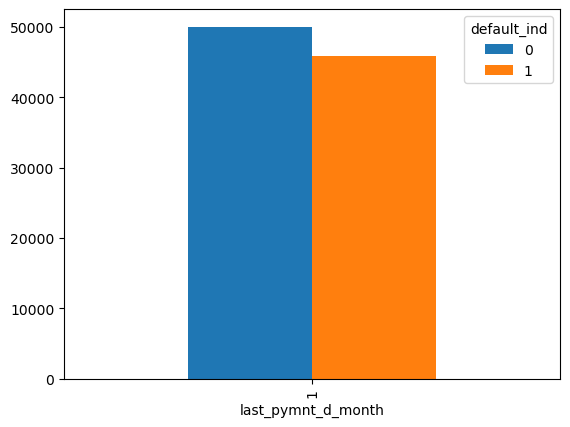

In [239]:
pd.crosstab(df.last_pymnt_d_month,df.default_ind).plot(kind='bar')

In [240]:
# We can see that all of the Payments are done in the first month.

<Axes: xlabel='last_pymnt_d_date'>

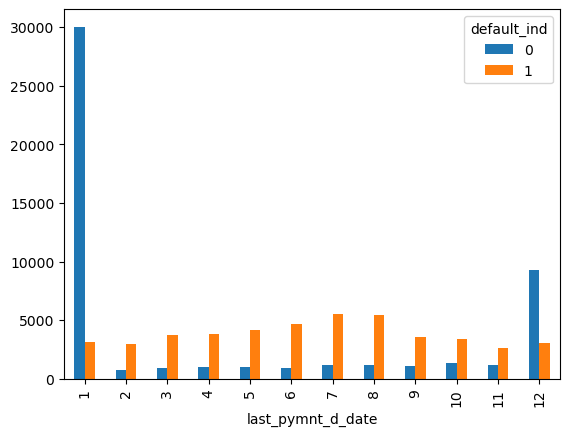

In [241]:
pd.crosstab(df.last_pymnt_d_date,df.default_ind).plot(kind='bar')

In [242]:
# We can see that most of the payments are done in 1st and 12th of the months.

### Last Payment Amount

Skewness:  4.714149129030251
Kurtosis:  25.414230240223908


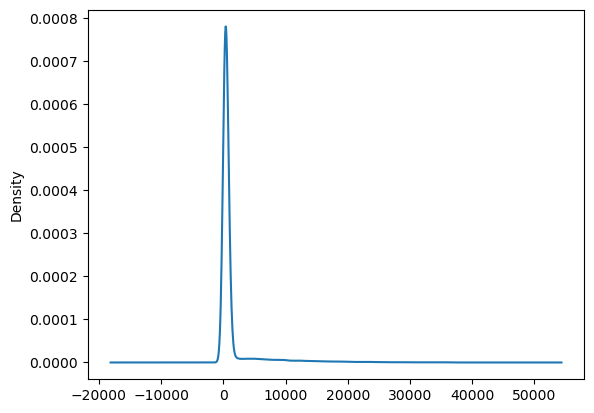

In [243]:
df.last_pymnt_amnt.plot(kind='kde')
print('Skewness: ',df.last_pymnt_amnt.skew())
print('Kurtosis: ',df.last_pymnt_amnt.kurt())
plt.show()

In [244]:
# We can see that our data is Right Skewed.

In [245]:
df.last_pymnt_amnt.isna().sum()

0

<Axes: xlabel='default_ind', ylabel='last_pymnt_amnt'>

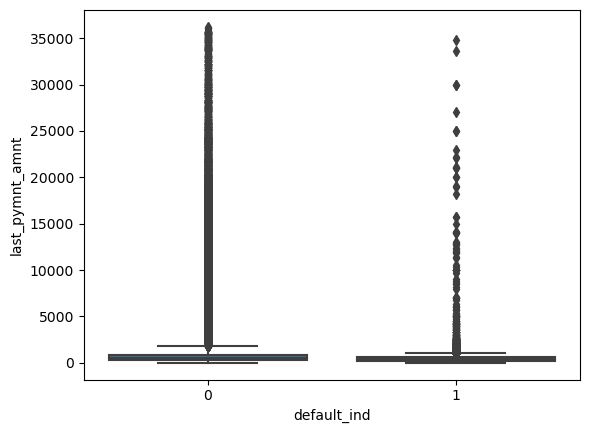

In [246]:
sns.boxplot(x=df.default_ind,y=df.last_pymnt_amnt)

In [247]:
# We can see that Non Defaulters has huge number of outliers compared to Defaulters.

### Last Credit Checked Date

In [248]:
df.last_credit_pull_d.value_counts()

last_credit_pull_d
01-01-2016    62822
01-12-2015     4596
01-09-2015     1626
01-07-2015     1606
01-08-2015     1514
              ...  
01-10-2007        2
01-04-2009        1
01-03-2009        1
01-08-2008        1
01-02-2009        1
Name: count, Length: 86, dtype: int64

In [249]:
# We can infer that, the Lender checked the Borrowers Credit is not much useful when it comes to predict the defaulters.
# So we are Planning to Drop it.

In [250]:
df.drop('last_credit_pull_d',axis=1,inplace=True)

### Collections over 12 Months excluding Medical Expense

In [251]:
df.collections_12_mths_ex_med.value_counts()

collections_12_mths_ex_med
0.0     94921
1.0       953
2.0        61
3.0         5
4.0         4
5.0         1
10.0        1
Name: count, dtype: int64

<Axes: xlabel='collections_12_mths_ex_med'>

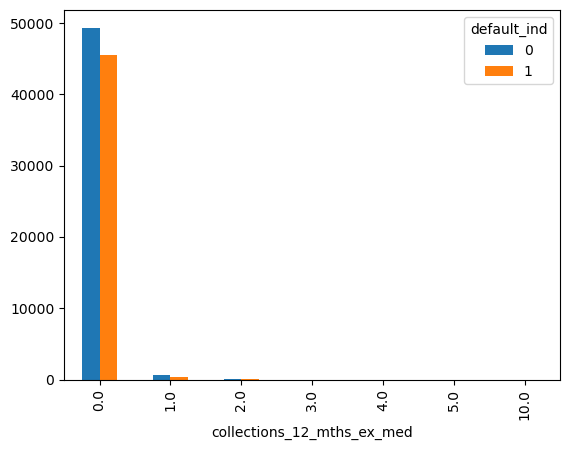

In [252]:
pd.crosstab(df.collections_12_mths_ex_med,df.default_ind).plot(kind='bar')

<Axes: xlabel='collections_12_mths_ex_med'>

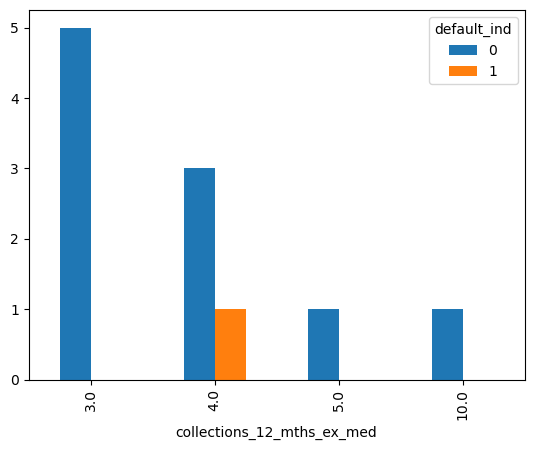

In [253]:
pd.crosstab(df.collections_12_mths_ex_med[df.collections_12_mths_ex_med>2],df.default_ind).plot(kind='bar')

In [254]:
# we can Infer that People who paid their Payment within the Time period are referred to '0'.
# Others are the People who had not done their Payment within the Time period are transferred to
# Collections Departments.

In [255]:
def bucket10(x):
    if x==0:
        return 'b10 On Time'
    else:
        return 'b10 Late'

In [256]:
df.collections_12_mths_ex_med = df.collections_12_mths_ex_med.apply(bucket10)

In [257]:
df = pd.concat([df,pd.get_dummies(df.collections_12_mths_ex_med,dtype='int',drop_first=True)],axis=1)
df.drop('collections_12_mths_ex_med',axis=1,inplace=True)

### Application Type

<Axes: xlabel='application_type'>

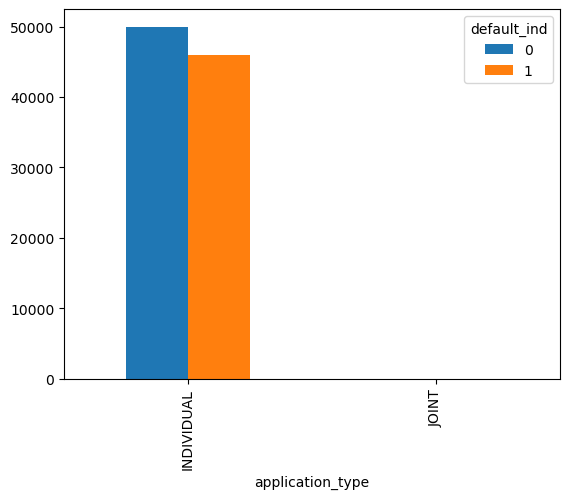

In [258]:
pd.crosstab(df.application_type,df.default_ind).plot(kind='bar')

In [259]:
df.application_type.isna().sum()

0

In [260]:
# Chi Square Test:

# H0 - The Application Type is not dependant on Loan Default
# H1 - The Application Type is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.application_type,df.default_ind))[1] <=0.05

True

In [261]:
df = pd.concat([df,pd.get_dummies(df.application_type,dtype='int',drop_first=True)],axis=1)
df.drop('application_type',axis=1,inplace=True)

### No of Deliquent by Customers

In [262]:
df.acc_now_delinq.value_counts()

acc_now_delinq
0    95581
1      350
2       19
3        3
5        1
Name: count, dtype: int64

<Axes: xlabel='acc_now_delinq'>

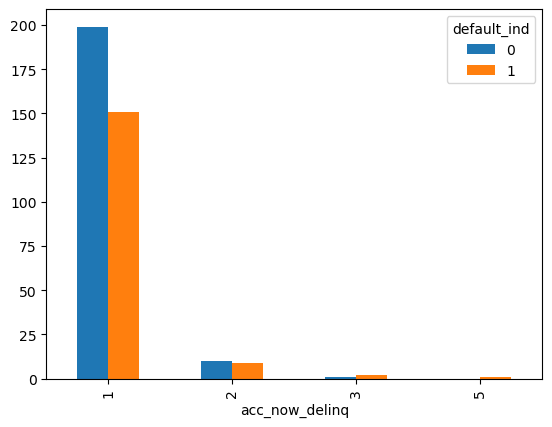

In [263]:
pd.crosstab(df.acc_now_delinq[df.acc_now_delinq>0],df.default_ind).plot(kind='bar')

<Axes: xlabel='acc_now_delinq'>

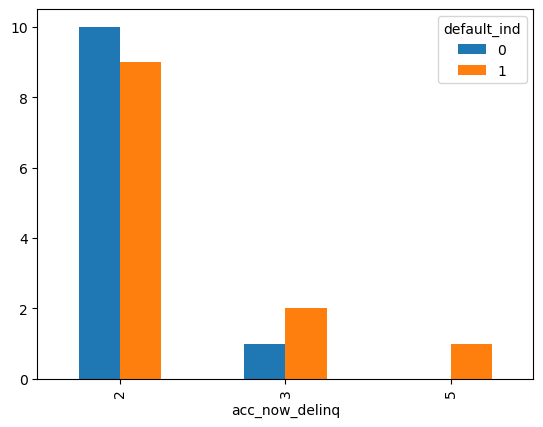

In [264]:
pd.crosstab(df.acc_now_delinq[df.acc_now_delinq>1],df.default_ind).plot(kind='bar')

In [265]:
# We can infer that people who tend to make late Payments more than 2 are prone to Default.

In [266]:
# Chi Square Test:

# H0 - The No of Deliquents is not dependant on Loan Default
# H1 - The No of Deliquents is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.acc_now_delinq,df.default_ind))[1] <=0.05

False

In [267]:
def bucket11(x):
    if x == 0:
        return 'b11 Safe'
    elif x>0 and x<=2:
        return 'b11 medium'
    else:
        return 'b11 Danger'

In [268]:
df.acc_now_delinq = df.acc_now_delinq.apply(bucket11)

In [269]:
# Chi Square Test:

# H0 - The No of Deliquents is not dependant on Loan Default
# H1 - The No of Deliquents is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.acc_now_delinq,df.default_ind))[1] <=0.05

False

In [270]:
# Here we can see that before bucketing the variable 'No of Deliquents', It is not dependent on Target Variable.
# After doing Outliers Treatments also it is not Dependant.
# We are Planning to Drop it.

In [271]:
df.drop('acc_now_delinq',axis=1,inplace=True)

### Total Collection Amounts

Skewness:  35.12753963291095
Kurtosis:  2150.095224179053


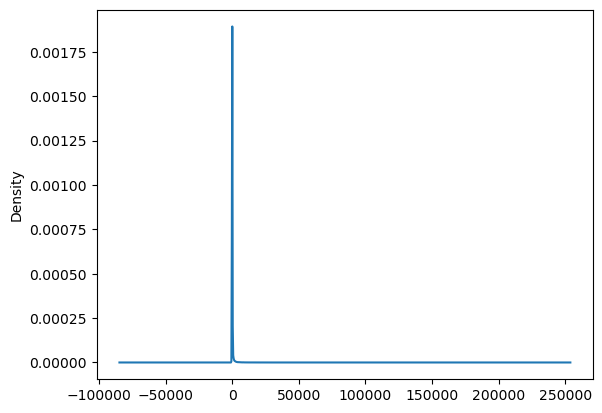

In [272]:
df.tot_coll_amt.plot(kind='kde')
print('Skewness: ',df.tot_coll_amt.skew())
print('Kurtosis: ',df.tot_coll_amt.kurt())
plt.show()

In [273]:
# We can see that our Data is Right Skewed.

In [274]:
df.tot_coll_amt.isna().sum()

13682

In [275]:
df.tot_coll_amt[df.tot_coll_amt !=0].quantile(1)

169257.0

In [276]:
def bucket12(x):
    if x==0:
        return 'b12 Zero'
    elif x!=0 and x<172:
        return 'b12 Low'
    elif x>=172 and x<1035:
        return 'b12 Medium'
    elif x>=1035 and x<=169257:
        return 'b12 High'
    else:
        return 'b12 Null'

In [277]:
df.tot_coll_amt = df.tot_coll_amt.apply(bucket12)

In [278]:
# Chi Square Test:

# H0 - The Total Collection Amounts is not dependant on Loan Default
# H1 - The Total Collection Amounts is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.tot_coll_amt,df.default_ind))[1] <=0.05

True

In [279]:
df = pd.concat([df,pd.get_dummies(df.tot_coll_amt,dtype='int',drop_first=True)],axis=1)
df.drop('tot_coll_amt',axis=1,inplace=True)

### Total Current Balance

Skewness:  2.47732073773287
Kurtosis:  13.746197288517514


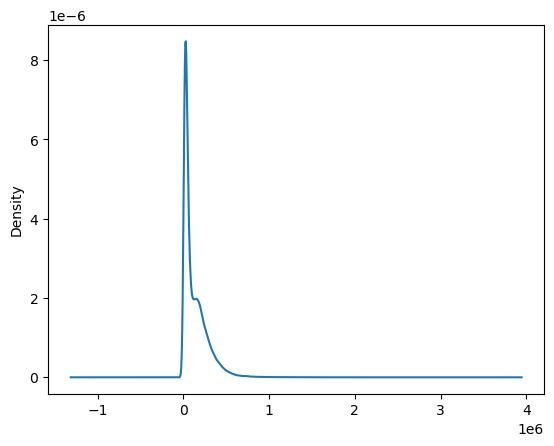

In [280]:
df.tot_cur_bal.plot(kind='kde')
print('Skewness: ',df.tot_cur_bal.skew())
print('Kurtosis: ',df.tot_cur_bal.kurt())
plt.show()

In [281]:
# We can see that our data is right skewed.

In [282]:
df.tot_cur_bal.isna().sum()

13682

In [283]:
df.tot_cur_bal[df.tot_cur_bal !=0].quantile(1)

2629423.0

In [284]:
def bucket13(x):
    if x==0:
        return 'b13 Zero'
    elif x!=0 and x<36627:
        return 'b13 Low'
    elif x>=36627 and x<205005:
        return 'b13 Medium'
    elif x>=205005 and x<=2629423:
        return 'b13 High'
    else:
        return 'b13 Null'

In [285]:
df.tot_cur_bal = df.tot_cur_bal.apply(bucket13)

In [286]:
# Chi Square Test:

# H0 - The Total Current Balance is not dependant on Loan Default
# H1 - The Total Current Balance is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.tot_cur_bal,df.default_ind))[1] <=0.05

True

In [287]:
df = pd.concat([df,pd.get_dummies(df.tot_cur_bal,dtype='int',drop_first=True)],axis=1)
df.drop('tot_cur_bal',axis=1,inplace=True)

### Total Revolving High Credit Limit

Skewness:  4.876643952003565
Kurtosis:  54.70258612116677


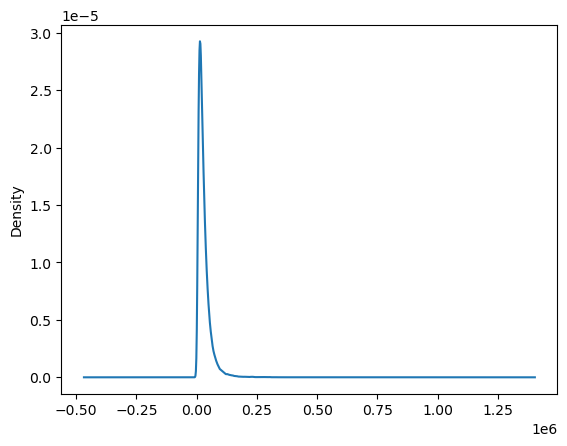

In [288]:
df.total_rev_hi_lim.plot(kind='kde')
print('Skewness: ',df.total_rev_hi_lim.skew())
print('Kurtosis: ',df.total_rev_hi_lim.kurt())
plt.show()

In [289]:
# We can see that our Data is right skewed.

In [290]:
df.total_rev_hi_lim.isna().sum()

13682

In [291]:
df.total_rev_hi_lim[df.total_rev_hi_lim !=0].quantile(0.77)

38700.0

In [292]:
def bucket14(x):
    if x==0:
        return 'b14 Zero'
    elif x!=0 and x<15900:
        return 'b14 Low'
    elif x>=15900 and x<38700:
        return 'b14 Medium'
    elif x>=38700 and x<=935200:
        return 'b14 High'
    else:
        return 'b14 Null'

In [293]:
df.total_rev_hi_lim = df.total_rev_hi_lim.apply(bucket14)

In [294]:
# Chi Square Test:

# H0 - The Total Revolving High Credit Limit is not dependant on Loan Default
# H1 - The Total Revolving High Credit Limit is dependant on Loan Default

stats.chi2_contingency(pd.crosstab(df.total_rev_hi_lim,df.default_ind))[1] <=0.05

True

In [295]:
df = pd.concat([df,pd.get_dummies(df.total_rev_hi_lim,dtype='int',drop_first=True)],axis=1)
df.drop('total_rev_hi_lim',axis=1,inplace=True)

### Defaulters - Target Variable

<Axes: ylabel='count'>

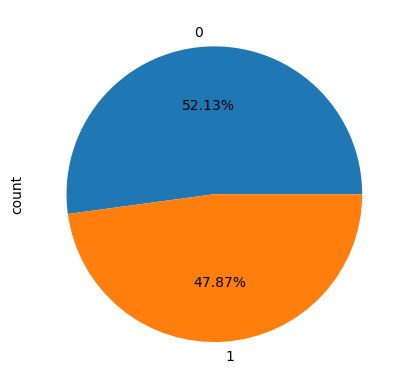

In [296]:
df.default_ind.value_counts().plot(kind='pie',autopct='%.2f%%')

In [297]:
# We can see that our Data is Balanced.
# From this, we can relay on accuracy score.

In [298]:
df.default_ind.isna().sum()

0

In [299]:
cor = df.corr()

In [300]:
cor[(cor>0.65)|(cor<-0.65)].tail(40)

,funded_amnt,int_rate,installment,grade,annual_inc,dti,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt,default_ind,60 months,General,Healthcare,Management,Other,Intermediate,Senior,Unknown,NONE,OTHER,OWN,RENT,Verified,issue_d_year,issue_d_month,issue_d_date,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,northeast,south,west,b4 Low,b4 Medium,b4 Very High,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_date,b5 Good,b5 Medium,b6 Low,b6 Medium,b6 Very High,w,b7 Little Late,b7 On Time,b7 Too Late,b8 Little Late,b8 On Time,b8 Too Late,b9 Little Late,b9 On Time,b9 Too Late,last_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_date,b10 On Time,JOINT,b12 Low,b12 Medium,b12 Null,b12 Zero,b13 Low,b13 Medium,b13 Null,b13 Zero,b14 Low,b14 Medium,b14 Null,b14 Zero
south,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b4 Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,-0.94888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b4 Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.94888,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b4 Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
earliest_cr_line_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
earliest_cr_line_month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
earliest_cr_line_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b5 Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,

In [301]:
df.drop(['total_pymnt','last_pymnt_amnt'],axis=1,inplace=True)

## Logistic Base Model

In [302]:
from sklearn.model_selection import train_test_split

x = df.drop('default_ind',axis=1)
y = df.default_ind
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state=100)

In [303]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ytpred = lr.predict(xtrain)
ypred = lr.predict(xtest)

In [304]:
from sklearn.metrics import classification_report

print(classification_report(ytrain,ytpred))
print()
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     34896
           1       1.00      0.96      0.98     32271

    accuracy                           0.98     67167
   macro avg       0.98      0.98      0.98     67167
weighted avg       0.98      0.98      0.98     67167


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     15129
           1       1.00      0.97      0.98     13658

    accuracy                           0.98     28787
   macro avg       0.98      0.98      0.98     28787
weighted avg       0.98      0.98      0.98     28787



## Logestic Model with PCA Data

In [305]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df.drop('default_ind',axis=1)),columns=df.drop('default_ind',axis=1).columns)

In [306]:
from sklearn.decomposition import PCA

pca = PCA(random_state=10)
pca.fit(df_scaled)
np.cumsum(pca.explained_variance_ratio_)

# n_components = 51 (90% Variance)

array([0.08662624, 0.14538772, 0.18828702, 0.21934492, 0.24591174,
       0.27088214, 0.29459531, 0.31660267, 0.33825396, 0.35922232,
       0.37933377, 0.39916837, 0.41807306, 0.43658929, 0.45420122,
       0.47149312, 0.48780494, 0.50386878, 0.5198347 , 0.53514944,
       0.54963787, 0.56360127, 0.5774809 , 0.5909023 , 0.60411701,
       0.61727172, 0.63027541, 0.64322309, 0.65613272, 0.66900127,
       0.68183543, 0.69462142, 0.70737106, 0.72008922, 0.73277816,
       0.74546669, 0.75811308, 0.77072495, 0.78332594, 0.79584623,
       0.80832978, 0.82075977, 0.83299764, 0.84516522, 0.856879  ,
       0.86795487, 0.87877744, 0.88930439, 0.89913052, 0.9087312 ,
       0.91785909, 0.92582056, 0.93338121, 0.94041198, 0.94678892,
       0.95265691, 0.9577128 , 0.96252243, 0.96706193, 0.97130257,
       0.97545777, 0.97951427, 0.98325364, 0.98622283, 0.98892607,
       0.99151707, 0.99384222, 0.99593468, 0.99689429, 0.99761392,
       0.99814274, 0.99865318, 0.99911353, 0.99941262, 0.99968

In [307]:
pca = PCA(n_components=51,random_state=10)
pca_df = pd.DataFrame(pca.fit_transform(df_scaled),columns=['PCA1', 'PCA2', 'PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15','PCA16','PCA17','PCA18','PCA19','PCA20','PCA21`','PCA22','PCA23','PCA24','PCA25','PCA26','PCA27','PCA28','PCA29','PCA30','PCA31','PCA32','PCA33','PCA34','PCA35','PCA36','PCA37','PCA38','PCA39','PCA40','PCA41','PCA42','PCA43','PCA44','PCA45','PCA46','PCA47','PCA48','PCA49','PCA50','PCA51'])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21`,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32,PCA33,PCA34,PCA35,PCA36,PCA37,PCA38,PCA39,PCA40,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50,PCA51
0,3.148080,-0.236545,4.695162,-0.258639,0.649627,-0.396590,0.642726,-1.557382,-0.852210,-1.419976,-0.198713,0.448549,1.038046,-1.639994,1.247735,-0.663321,-1.018813,0.592738,-1.576440,-1.508612,0.174559,-0.648649,-0.046971,-0.385678,0.299989,1.269287,-0.673951,-0.293195,0.054889,-0.162206,0.135450,1.025553,-0.151437,-0.049464,0.463001,-0.217186,-0.431967,-0.458960,-0.546128,-0.659768,-1.132628,0.121915,-0.703529,0.188047,0.136447,-0.052879,0.206217,-0.373410,0.117913,-0.873128,0.013379
1,4.626730,-1.508778,3.782984,0.162969,0.731891,0.198383,-0.184200,1.581766,-0.092949,-2.932746,0.147548,-0.857164,-0.677095,0.488534,-0.333737,-0.797904,0.149870,0.629905,-0.704888,-2.067692,0.113036,0.512068,-0.111879,-0.208044,0.477796,0.987055,-0.268592,0.094179,0.180740,0.193161,-0.109562,-0.673861,-0.086291,0.316794,-0.134857,0.190164,0.448189,0.409806,0.374318,0.085175,0.522550,-1.109096,-0.648893,-0.078253,-0.435151,0.123879,0.181157,-0.417474,0.664116,-0.027745,0.451750
2,6.285097,0.769123,0.022027,-0.832915,-0.351900,0.653520,-1.605345,-0.380438,0.629015,-0.125002,5.872690,1.583704,1.967663,-0.152484,-2.703659,-1.692536,1.365323,2.288329,-2.091061,-3.179423,0.398544,0.516775,-0.612045,0.166483,0.254749,-0.517951,1.561475,-0.059921,-0.878577,-1.156256,0.857811,0.314082,0.137986,-0.172002,-0.503870,1.563148,0.102942,0.399587,1.272142,0.973915,-0.474380,1.487029,-2.489367,9.544515,2.709751,-0.611831,0.042323,0.457873,-0.924382,-0.247328,-0.070504
3,2.911222,1.157708,4.757510,1.734875,-0.609015,0.404868,0.304081,0.311640,-0.986862,-0.768603,-0.121669,0.347120,0.752170,0.075945,1.671166,-0.098406,0.987591,0.614681,-2.641503,0.780329,0.105263,-0.030119,1.429666,-0.495762,-0.401505,1.235558,-0.555854,-0.376118,1.179481,0.135907,0.243055,-0.094899,-0.014258,0.352188,-0.278607,0.392108,0.666457,0.411565,-0.465749,-0.342500,-0.304747,-1.718189,0.777236,0.685822,0.192641,0.247564,-0.039270,0.990237,-0.257487,0.902835,-0.840323
4,3.489250,1.372948,3.111923,-0.306933,2.394609,-0.812147,0.370938,0.556492,-0.962520,-1.355509,0.237389,-0.160581,-0.825738,-1.078086,0.957068,0.125960,0.387275,-0.465117,-0.027810,-1.802740,0.061976,0.114028,0.106362,0.287325,0.459800,1.341761,-0.377595,-0.202239,0.440352,0.272383,-0.036578,-0.580401,-0.158987,-0.030821,-0.152788,0.159658,0.291014,0.252872,0.281603,-0.309181,0.368681,-0.957778,-0.766527,0.172451,0.106240,0.309483,-0.089347,1.187013,0.472594,0.618954,-0.585666


In [308]:
pca_df = pd.concat([pca_df,df.default_ind.reset_index(drop=True)],axis=1)

In [309]:
from sklearn.model_selection import train_test_split

x = pca_df.drop('default_ind',axis=1)
y = pca_df.default_ind
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state=100)

In [310]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ytpred = lr.predict(xtrain)
ypred = lr.predict(xtest)

In [311]:
print(classification_report(ytrain,ytpred))
print()
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     34896
           1       0.97      0.94      0.95     32271

    accuracy                           0.96     67167
   macro avg       0.96      0.95      0.95     67167
weighted avg       0.96      0.96      0.96     67167


              precision    recall  f1-score   support

           0       0.95      0.97      0.96     15129
           1       0.97      0.94      0.95     13658

    accuracy                           0.96     28787
   macro avg       0.96      0.96      0.96     28787
weighted avg       0.96      0.96      0.96     28787



## Random Forest

In [312]:
from sklearn.model_selection import train_test_split

x = df.drop('default_ind',axis=1)
y = df.default_ind
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state=100)

In [313]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50,random_state=10)
rf.fit(xtrain,ytrain)
ytpred = rf.predict(xtrain)
ypred = rf.predict(xtest)

In [314]:
print(classification_report(ytrain,ytpred))
print()
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34896
           1       1.00      1.00      1.00     32271

    accuracy                           1.00     67167
   macro avg       1.00      1.00      1.00     67167
weighted avg       1.00      1.00      1.00     67167


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15129
           1       0.99      0.99      0.99     13658

    accuracy                           0.99     28787
   macro avg       0.99      0.99      0.99     28787
weighted avg       0.99      0.99      0.99     28787



In [331]:
pd.DataFrame(rf.feature_importances_,index=xtrain.columns).sort_values(by=0,ascending=False).head(10)

,0
out_prncp,0.190506
last_pymnt_d_date,0.152538
total_rec_prncp,0.149417
b8 On Time,0.104222
last_pymnt_d_year,0.079464
b9 On Time,0.057746
issue_d_year,0.039410
int_rate,0.018632
total_rec_int,0.017461
installment,0.017397


## Clustering

In [315]:
df1 = df.drop('default_ind',axis=1)

In [316]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df1),columns=df1.columns)

In [317]:
from sklearn.cluster import KMeans

wcss = []

for i in range(2,10):
    km = KMeans(n_clusters=i,random_state=10)
    km.fit(df_scaled)
    wcss.append(km.inertia_)
print(wcss)

[7040988.137784961, 6777503.224006753, 6569325.904296071, 6464577.139938215, 6303131.601556829, 6189083.975080919, 6099589.629436368, 6014835.0912962835]


<Axes: >

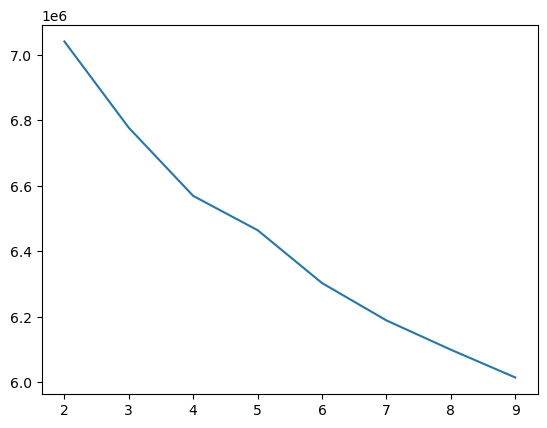

In [318]:
sns.lineplot(x=range(2,10),y=wcss)

In [319]:
from sklearn.metrics import silhouette_score

scores = []

for i in range(2,6):
    km = KMeans(n_clusters=i,random_state=100)
    clusters = km.fit_predict(df_scaled)
    scores.append(silhouette_score(df_scaled,clusters,random_state=100))
scores

[0.1722409680797199,
 0.10350976382797722,
 0.056365925690070616,
 0.05540405986345307]

In [320]:
pd.DataFrame(scores,index=range(2,6)).idxmax()

0    2
dtype: int64

In [321]:
km = KMeans(n_clusters=2,random_state=100)
clusters = km.fit_predict(df_scaled)

In [322]:
df['clusters'] = clusters

<Axes: xlabel='funded_amnt', ylabel='out_prncp'>

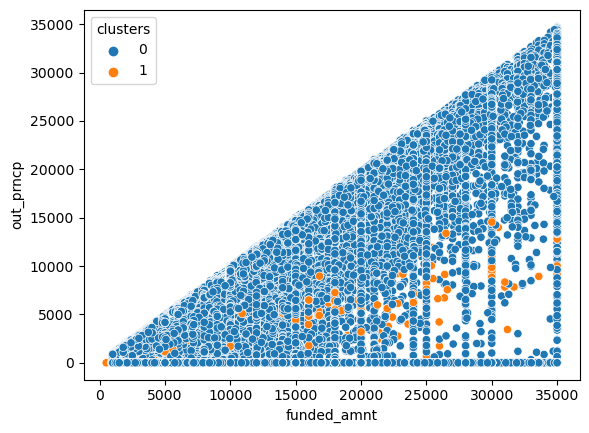

In [323]:
sns.scatterplot(x=df.funded_amnt,y=df.out_prncp,hue=df.clusters)

In [324]:
df[df.clusters == 0].describe()

,funded_amnt,int_rate,installment,grade,annual_inc,dti,revol_bal,revol_util,total_acc,out_prncp,total_rec_prncp,total_rec_int,default_ind,60 months,General,Healthcare,Management,Other,Intermediate,Senior,Unknown,NONE,OTHER,OWN,RENT,Verified,issue_d_year,issue_d_month,issue_d_date,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,northeast,south,west,b4 Low,b4 Medium,b4 Very High,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_date,b5 Good,b5 Medium,b6 Low,b6 Medium,b6 Very High,w,b7 Little Late,b7 On Time,b7 Too Late,b8 Little Late,b8 On Time,b8 Too Late,b9 Little Late,b9 On Time,b9 Too Late,last_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_date,b10 On Time,JOINT,b12 Low,b12 Medium,b12 Null,b12 Zero,b13 Low,b13 Medium,b13 Null,b13 Zero,b14 Low,b14 Medium,b14 Null,b14 Zero,clusters
count,82221.000000,82221.000000,82221.000000,82221.000000,8.222100e+04,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.0,82221.000000,82221.000000,82221.000000,82221.0,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.0,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.00000,82221.000000,82221.000000,82221.000000,82221.0,82221.000000,82221.000000,82221.000000,82221.000000,82221.000000,82221.0,82221.000000,82221.000000,82221.000000,82221.0,82221.000000,82221.000000,82221.000000,82221.0,82221.000000,82221.0
mean,15004.893823,14.582133,449.639459,3.901485,7.128161e+04,18.807207,16391.609808,57.216431,25.270989,5385.700143,4573.835623,1883.361896,0.437151,0.326608,0.121100,0.012649,0.070189,0.780701,0.196957,0.519587,0.053308,0.000097,0.000122,0.094976,0.422994,0.726566,2013.942484,1.0,6.798336,0.218496,0.613493,0.0,0.053745,0.004087,0.016833,0.010083,0.006519,0.048966,0.000596,0.012868,0.005133,0.001739,0.203062,0.354155,0.266635,0.992654,0.006616,0.000134,1997.951083,1.0,6.731918,0.517678,0.281984,0.708529,0.280537,0.000559,0.450688,0.001095,0.964206,0.012272,0.038409,0.801608,0.086292,0.03791,0.806424,0.081549,2015.073084,1.0,5.141229,0.987534,0.000328,0.043833,0.058489,0.0,0.867066,0.329733,0.440009,0.0,0.000195,0.327799,0.441821,0.0,0.000328,0.0
std,8383.784952,4.608728,244.884598,1.364027,4.567025e+04,8.162370,19280.090146,23.170407,11.761577,7827.528299,5506.413976,2048.669096,0.496037,0.468975,0.326246,0.111754,0.255467,0.413774,0.397702,0.499619,0.224647,0.009864,0.011028,0.293183,0.494038,0.445724,0.916450,0.0,3.404161,0.413229,0.486952,0.0,0.225516,0.063796,0.128645,0.099905,0.080477,0.215797,0.024405,0.112705,0.071458,0.041668,0.402281,0.478259,0.442203,0.085394,0.081072,0.011566,7.321205,0.0,3.409206,0.499690,0.449968,0.454442,0.449264,0.023647,0.497565,0.033067,0.185777,0.110097,0.192182,0.398791,0.280796,0.19098,0.395103,0.273677,0.854552,0.0,4.152455,0.110956,0.018118,0.204725,0.234667,0.0,0.339506,0.470119,0.496391,0.0,0.013949,0.469414,0.496607,0.0,0.018118,0.0
min,1000.000000,5.320000,27.850000,0.000000,6.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1952.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [325]:
df[df.clusters == 1].describe()

,funded_amnt,int_rate,installment,grade,annual_inc,dti,revol_bal,revol_util,total_acc,out_prncp,total_rec_prncp,total_rec_int,default_ind,60 months,General,Healthcare,Management,Other,Intermediate,Senior,Unknown,NONE,OTHER,OWN,RENT,Verified,issue_d_year,issue_d_month,issue_d_date,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,northeast,south,west,b4 Low,b4 Medium,b4 Very High,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_date,b5 Good,b5 Medium,b6 Low,b6 Medium,b6 Very High,w,b7 Little Late,b7 On Time,b7 Too Late,b8 Little Late,b8 On Time,b8 Too Late,b9 Little Late,b9 On Time,b9 Too Late,last_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_date,b10 On Time,JOINT,b12 Low,b12 Medium,b12 Null,b12 Zero,b13 Low,b13 Medium,b13 Null,b13 Zero,b14 Low,b14 Medium,b14 Null,b14 Zero,clusters
count,13733.000000,13733.000000,13733.000000,13733.000000,1.373300e+04,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.0,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.0,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.0,13733.000000,13733.0,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.0,13733.000000,13733.000000,13733.0,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.0,13733.000000,13733.000000,13733.000000,13733.0,13733.0
mean,12486.171994,13.792841,373.719128,4.030219,6.440673e+04,14.964974,13848.572126,56.390239,22.103401,79.530176,6208.283995,2430.873476,0.727154,0.318284,0.020243,0.000073,0.0,0.979684,0.254861,0.430496,0.038593,0.000073,0.001820,0.081264,0.494794,0.635549,2011.066264,1.0,6.311003,0.129178,0.526396,0.004587,0.058254,0.010413,0.035389,0.016530,0.014127,0.092260,0.002476,0.060293,0.008884,0.016821,0.233307,0.328916,0.300590,0.998398,0.001456,0.0,1997.296512,1.0,6.773538,0.439671,0.292289,0.818030,0.179058,0.000073,0.000146,0.035316,0.900386,0.027962,0.342533,0.450666,0.075075,0.311804,0.505134,0.076677,2012.829316,1.0,6.551300,0.999417,0.0,0.000510,0.000437,0.996286,0.002694,0.002403,0.001019,0.996286,0.0,0.002621,0.000583,0.996286,0.0,1.0
std,7958.288086,4.114047,233.277343,1.442470,4.351037e+04,7.072780,14336.280705,26.858352,11.172486,738.542846,5986.203989,2758.629223,0.445439,0.465827,0.140836,0.008533,0.0,0.141084,0.435799,0.495164,0.192630,0.008533,0.042629,0.273250,0.499991,0.481293,1.062279,0.0,3.158253,0.335409,0.499321,0.067578,0.234231,0.101515,0.184768,0.127505,0.118017,0.289402,0.049697,0.238037,0.093837,0.128604,0.422951,0.469836,0.458531,0.039994,0.038136,0.0,6.751189,0.0,3.526353,0.496365,0.454831,0.385834,0.383415,0.008533,0.012067,0.184585,0.299496,0.164870,0.474574,0.497578,0.263521,0.463247,0.499992,0.266087,1.447144,0.0,3.439578,0.024130,0.0,0.022572,0.020898,0.060829,0.051838,0.048963,0.031914,0.060829,0.0,0.051135,0.024130,0.060829,0.0,0.0
min,500.000000,5.420000,15.690000,0.000000,4.080000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,8.230000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1954.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000